cpu code, floating point precision


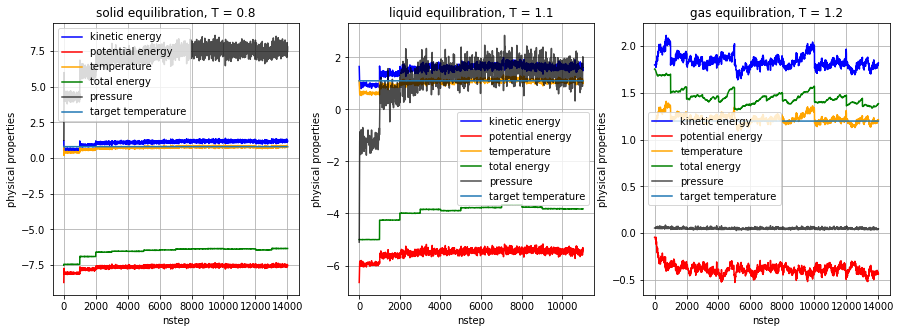

gpu code global memory, floating point precision


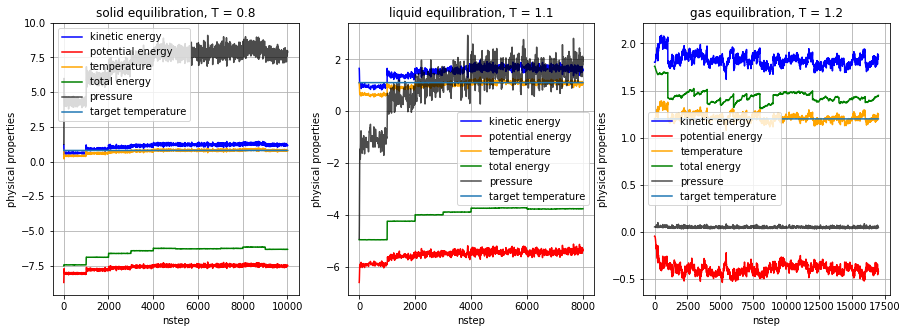

gpu code portable memory, floating point precision


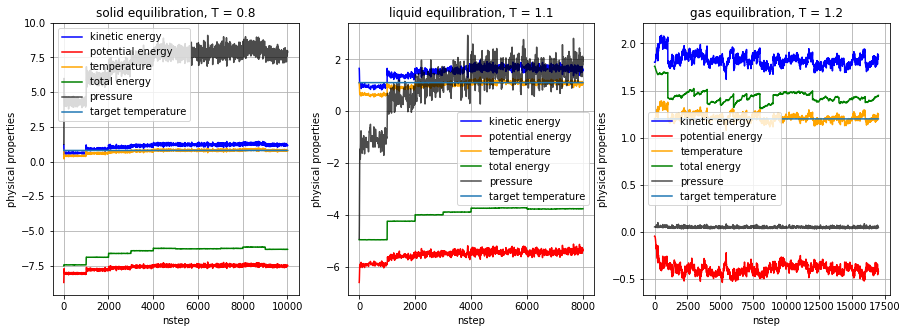

gpu code texture memory, floating point precision


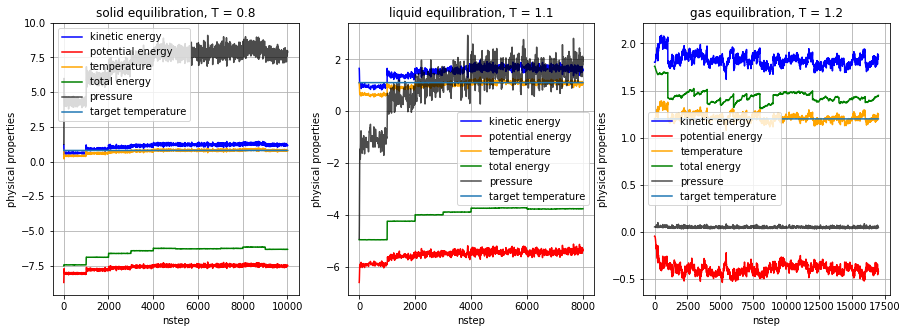

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

codes = "ex_cpu/","global_gpu/","portable_gpu/","texture_gpu/","target temperature"
double_codes = "ex_cpu_double/","texture_double_precision/"
nstep=10000
equilibrium = "raggiungimento_eq/"
phases = "solid/","liquid/","gas/"
files = ["output_ekin"+str(nstep)+".dat","output_epot"+str(nstep)+".dat",
"output_temp"+str(nstep)+".dat","output_etot"+str(nstep)+".dat",
"output_press"+str(nstep)+".dat"]
temperature = 0.8,1.1,1.2
properties = "kinetic energy","potential energy","temperature","total energy","pressure","target temperature"
title = "solid equilibration","liquid equilibration","gas equilibration"
color = "blue","red","orange","green","black"


print("cpu code, floating point precision")

fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(15, 5))

for j in range(3):
    for i in range(5):
        val = np.loadtxt(codes[0]+equilibrium+phases[j]+files[i],usecols=(0),delimiter=' ',unpack='true')
        if (i == 4):
            axs[j].plot(val,color=color[i],alpha=0.7)
        else:
            axs[j].plot(val,color=color[i])
        axs[j].set_ylabel("physical properties")
        axs[j].set_xlabel("nstep")
    y = np.full(len(val),temperature[j])
    x = np.arange(len(val))
    axs[j].plot(x,y)
    axs[j].grid(True)
    axs[j].set_title(title[j]+f", T = {temperature[j]}")
    axs[j].legend(properties)

plt.show()
    
print("gpu code global memory, floating point precision") 
    
fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(15, 5))

for j in range(3):
    for i in range(5):
        val = np.loadtxt(codes[1]+equilibrium+phases[j]+files[i],usecols=(0),delimiter=' ',unpack='true')
        if (i == 4):
            axs[j].plot(val,color=color[i],alpha=0.7)
        else:
            axs[j].plot(val,color=color[i])
        axs[j].set_ylabel("physical properties")
        axs[j].set_xlabel("nstep")
    y = np.full(len(val),temperature[j])
    x = np.arange(len(val))
    axs[j].plot(x,y)
    axs[j].grid(True)
    axs[j].set_title(title[j]+f", T = {temperature[j]}")
    axs[j].legend(properties)

plt.show()
    
print("gpu code portable memory, floating point precision")
    
fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(15, 5))

for j in range(3):
    for i in range(5):
        val = np.loadtxt(codes[2]+equilibrium+phases[j]+files[i],usecols=(0),delimiter=' ',unpack='true')
        if (i == 4):
            axs[j].plot(val,color=color[i],alpha=0.7)
        else:
            axs[j].plot(val,color=color[i])
        axs[j].set_ylabel("physical properties")
        axs[j].set_xlabel("nstep")
    y = np.full(len(val),temperature[j])
    x = np.arange(len(val))
    axs[j].plot(x,y)
    axs[j].grid(True)
    axs[j].set_title(title[j]+f", T = {temperature[j]}")
    axs[j].legend(properties)

plt.show()
    
print("gpu code texture memory, floating point precision")    

fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(15, 5))

for j in range(3):
    for i in range(5):
        val = np.loadtxt(codes[3]+equilibrium+phases[j]+files[i],usecols=(0),delimiter=' ',unpack='true')
        if (i == 4):
            axs[j].plot(val,color=color[i],alpha=0.7)
        else:
            axs[j].plot(val,color=color[i])
        axs[j].set_ylabel("physical properties")
        axs[j].set_xlabel("nstep")
    y = np.full(len(val),temperature[j])
    x = np.arange(len(val))
    axs[j].plot(x,y)
    axs[j].grid(True)
    axs[j].set_title(title[j]+f", T = {temperature[j]}")
    axs[j].legend(properties)
  
plt.show()

the precision in the device calculus is different from that of the cpu
this is why the equilibration phases are different
plotting together the istantaneaous values of temperature


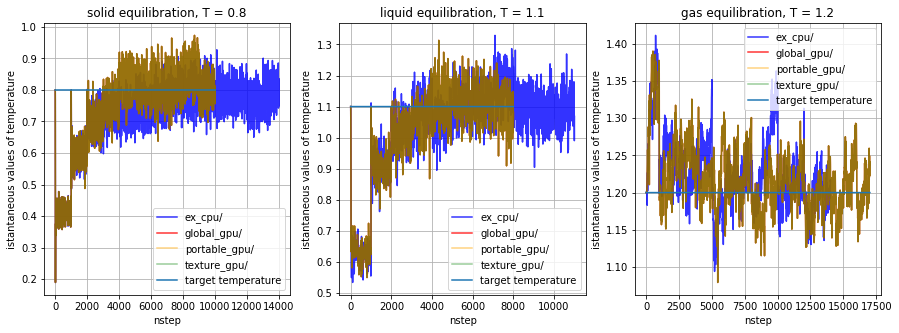

In [12]:
print("the precision in the device calculus is different from that of the cpu")
print("this is why the equilibration phases are different")
print("plotting together the istantaneaous values of temperature")

fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(15, 5))

for j in range(3):
    for i in range(4):
        val = np.loadtxt(codes[i]+equilibrium+phases[j]+files[2],usecols=(0),delimiter=' ',unpack='true')
        if i==3:
            axs[j].plot(val,color=color[i],alpha=0.4)
        elif i==2:
            axs[j].plot(val,color=color[i],alpha=0.5)
        else:
            axs[j].plot(val,color=color[i],alpha=0.8)
        axs[j].set_ylabel("istantaneous values of temperature")
        axs[j].set_xlabel("nstep")
    y = np.full(len(val),temperature[j])
    x = np.arange(len(val))
    axs[j].plot(x,y)
    axs[j].grid(True)
    axs[j].set_title(title[j]+f", T = {temperature[j]}")
    axs[j].legend(codes)
    
plt.show()

the results obtained with the gpu devices are very similar, almost equal
try to plot their difference respect to the cpu code


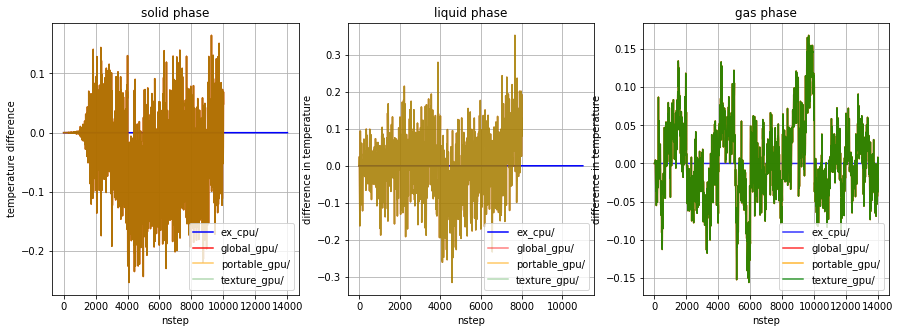

In [13]:
print("the results obtained with the gpu devices are very similar, almost equal")
print("try to plot their difference respect to the cpu code")

codes = "ex_cpu/","global_gpu/","portable_gpu/","texture_gpu/"

fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(15, 5))

#### solid #####

temp0 = np.loadtxt(codes[0]+equilibrium+phases[0]+files[2],usecols=(0),delimiter=' ',unpack='true')
temp1 = np.loadtxt(codes[1]+equilibrium+phases[0]+files[2],usecols=(0),delimiter=' ',unpack='true')
temp1 = temp0[0:len(temp1)]-temp1
temp2 = np.loadtxt(codes[2]+equilibrium+phases[0]+files[2],usecols=(0),delimiter=' ',unpack='true')
temp2 = temp0[0:len(temp2)]-temp2
temp3 = np.loadtxt(codes[3]+equilibrium+phases[0]+files[2],usecols=(0),delimiter=' ',unpack='true')
temp3 = temp0[0:len(temp3)]-temp3
temp0 = temp0-temp0

axs[0].plot(temp0,color=color[0],alpha=1)
axs[0].plot(temp1,color=color[1],alpha=0.9)
axs[0].plot(temp2,color=color[2],alpha=0.6)
axs[0].plot(temp3,color=color[3],alpha=0.3)
axs[0].grid(True)
axs[0].set_ylabel("temperature difference")
axs[0].set_xlabel("nstep")
axs[0].set_title("solid phase")
axs[0].legend(codes)


#### liquid #####

temp0 = np.loadtxt(codes[0]+equilibrium+phases[1]+files[2],usecols=(0),delimiter=' ',unpack='true')
temp1 = np.loadtxt(codes[1]+equilibrium+phases[1]+files[2],usecols=(0),delimiter=' ',unpack='true')
temp1 = temp0[0:len(temp1)]-temp1
temp2 = np.loadtxt(codes[2]+equilibrium+phases[1]+files[2],usecols=(0),delimiter=' ',unpack='true')
temp2 = temp0[0:len(temp2)]-temp2
temp3 = np.loadtxt(codes[3]+equilibrium+phases[1]+files[2],usecols=(0),delimiter=' ',unpack='true')
temp3 = temp0[0:len(temp3)]-temp3
temp0 = temp0-temp0

axs[1].plot(temp0,color=color[0],alpha=1)
axs[1].plot(temp1,color=color[1],alpha=0.5)
axs[1].plot(temp2,color=color[2],alpha=0.6)
axs[1].plot(temp3,color=color[3],alpha=0.3)
axs[1].grid(True)
axs[1].set_ylabel("difference in temperature")
axs[1].set_xlabel("nstep")
axs[1].set_title("liquid phase")
axs[1].legend(codes)


#### gas #####

temp0 = np.loadtxt(codes[0]+equilibrium+phases[2]+files[2],usecols=(0),delimiter=' ',unpack='true')
temp1 = np.loadtxt(codes[1]+equilibrium+phases[2]+files[2],usecols=(0),delimiter=' ',unpack='true')
temp1 = temp0-temp1[0:len(temp0)]
temp2 = np.loadtxt(codes[2]+equilibrium+phases[2]+files[2],usecols=(0),delimiter=' ',unpack='true')
temp2 = temp0-temp2[0:len(temp0)]
temp3 = np.loadtxt(codes[3]+equilibrium+phases[2]+files[2],usecols=(0),delimiter=' ',unpack='true')
temp3 = temp0-temp3[0:len(temp0)]
temp0 = temp0-temp0

axs[2].plot(temp0,color=color[0],alpha=0.8)
axs[2].plot(temp1,color=color[1],alpha=0.8)
axs[2].plot(temp2,color=color[2],alpha=0.8)
axs[2].plot(temp3,color=color[3],alpha=0.8)
axs[2].grid(True)
axs[2].set_ylabel("difference in temperature")
axs[2].set_xlabel("nstep")
axs[2].set_title("gas phase")
axs[2].legend(codes)



plt.show()

In [14]:
print("but this is just the equilibration.. so the most important thing is comparing a single simulation after")
print("reached the target temperature")
print("so now I will show some results after this equilibration phase with the corresping values for:" )
print("----------------------------------------------------------------------------------------------")
print("- total energy","- kinetic energy","- potential energy","- pressure","- temperature","- pair correlation function g(r)",sep="\n")

but this is just the equilibration.. so the most important thing is comparing a single simulation after
reached the target temperature
so now I will show some results after this equilibration phase with the corresping values for:
----------------------------------------------------------------------------------------------
- total energy
- kinetic energy
- potential energy
- pressure
- temperature
- pair correlation function g(r)


Solid phase
ex_cpu/ :  kinetic energy   1.19487 error  0.000697474
global_gpu/ :  kinetic energy   1.19955 error  0.000679991
portable_gpu/ :  kinetic energy   1.19955 error  0.000679991
texture_gpu/ :  kinetic energy   1.19955 error  0.000679991
-------------------------------------------------------------
ex_cpu/ :  potential energy   -7.52851 error  0.000679991
global_gpu/ :  potential energy   -7.52347 error  0.000809351
portable_gpu/ :  potential energy   -7.52347 error  0.000809351
texture_gpu/ :  potential energy   -7.52347 error  0.000809351
-------------------------------------------------------------
ex_cpu/ :  total energy   -6.33365 error  nan
global_gpu/ :  total energy   -6.32392 error  0.000277605
portable_gpu/ :  total energy   -6.32392 error  0.000277605
texture_gpu/ :  total energy   -6.32392 error  0.000277605
-------------------------------------------------------------
ex_cpu/ :  temperature   0.796577 error  0.000468137
global_gpu/ :  temperature   0.7997 error  0

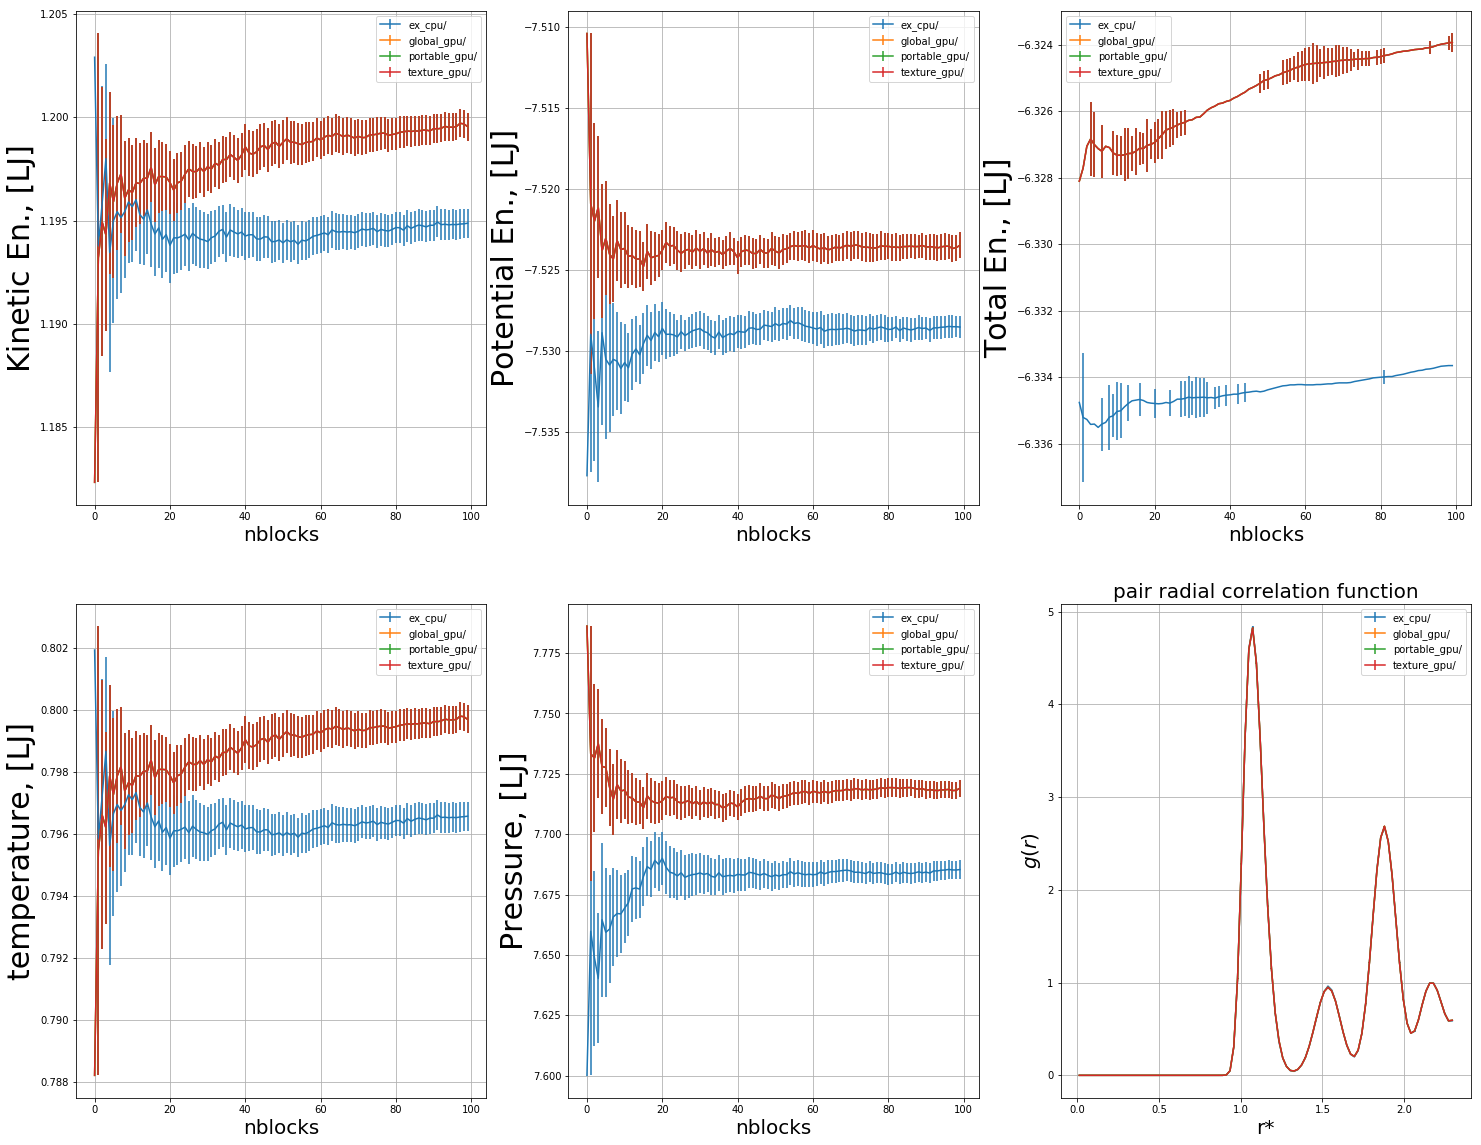

Liquid phase
ex_cpu/ :  kinetic energy   1.63656 error  0.00297253
global_gpu/ :  kinetic energy   1.66414 error  0.00255939
portable_gpu/ :  kinetic energy   1.66414 error  0.00255939
texture_gpu/ :  kinetic energy   1.66414 error  0.00255939
-------------------------------------------------------------
ex_cpu/ :  potential energy   -5.46079 error  0.00302513
global_gpu/ :  potential energy   -5.44024 error  0.00268072
portable_gpu/ :  potential energy   -5.44024 error  0.00268072
texture_gpu/ :  potential energy   -5.44024 error  0.00268072
-------------------------------------------------------------
ex_cpu/ :  total energy   -3.82423 error  0.0
global_gpu/ :  total energy   -3.7761 error  0.000490741
portable_gpu/ :  total energy   -3.7761 error  0.000490741
texture_gpu/ :  total energy   -3.7761 error  0.000490741
-------------------------------------------------------------
ex_cpu/ :  temperature   1.09104 error  0.00198159
global_gpu/ :  temperature   1.10943 error  0.00170705
p

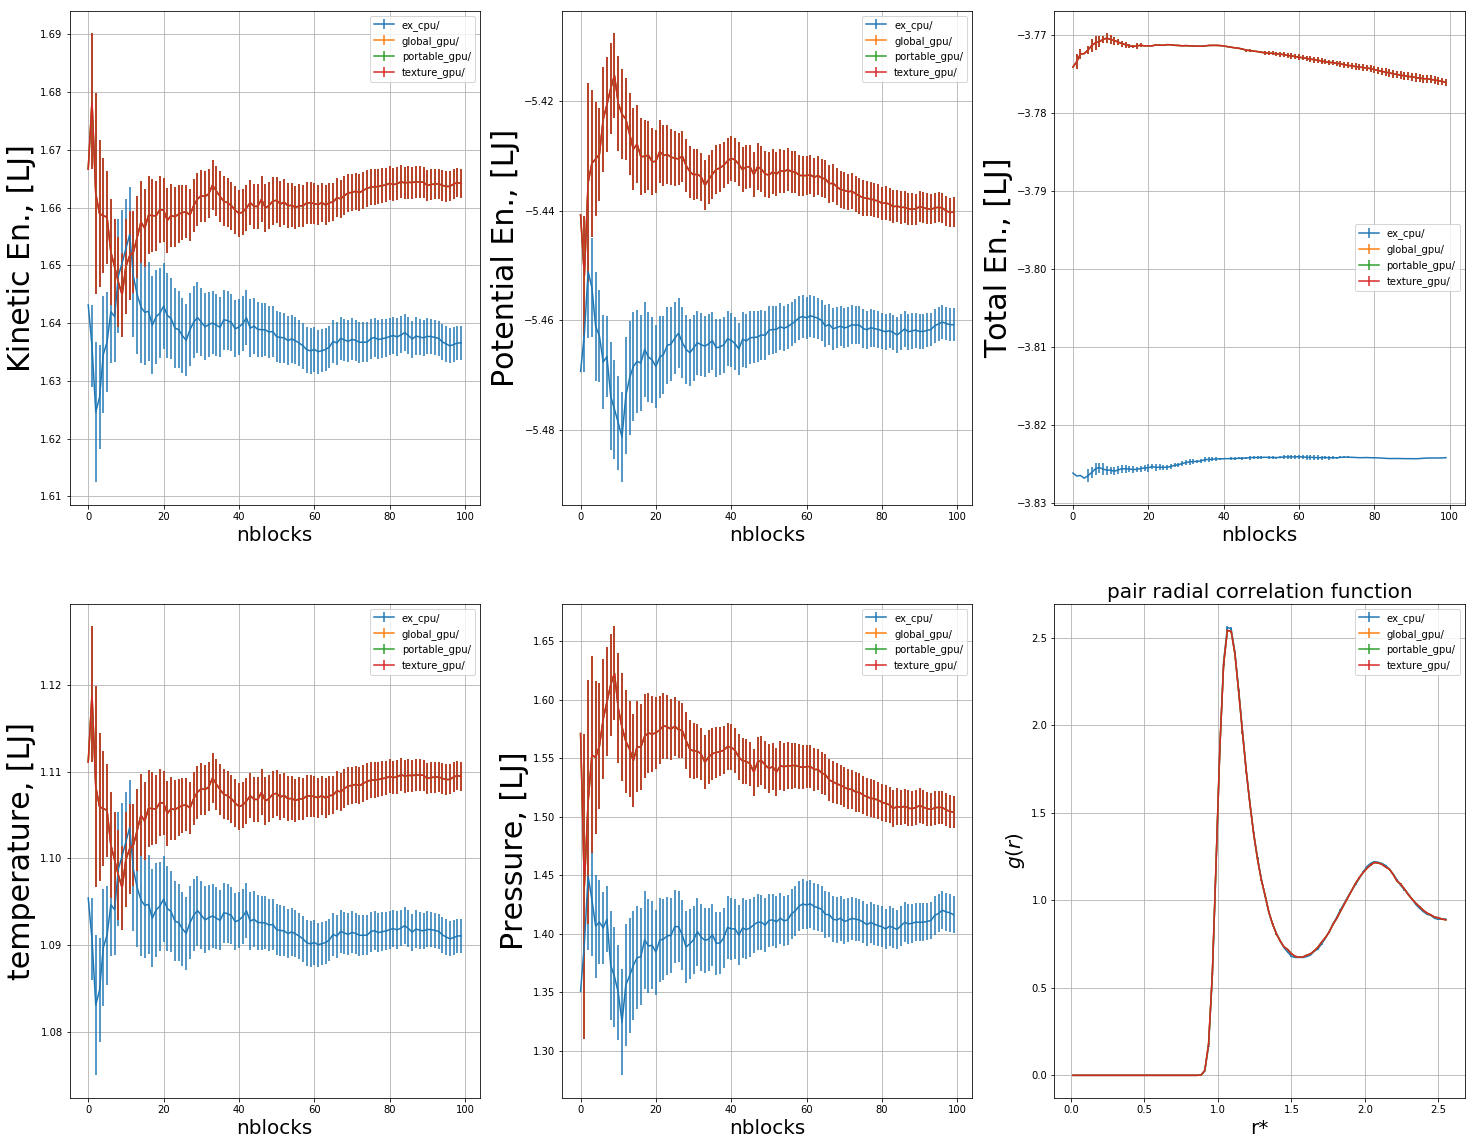

Gas phase
ex_cpu/ :  kinetic energy   2.0011 error  0.0152291
global_gpu/ :  kinetic energy   2.04946 error  0.0138
portable_gpu/ :  kinetic energy   2.04946 error  0.0138
texture_gpu/ :  kinetic energy   2.04946 error  0.0138
-------------------------------------------------------------
ex_cpu/ :  potential energy   -0.385704 error  0.00428249
global_gpu/ :  potential energy   -0.377824 error  0.00485037
portable_gpu/ :  potential energy   -0.377824 error  0.00485037
texture_gpu/ :  potential energy   -0.377824 error  0.00485037
-------------------------------------------------------------
ex_cpu/ :  total energy   1.61539 error  0.0173006
global_gpu/ :  total energy   1.67164 error  0.0155545
portable_gpu/ :  total energy   1.67164 error  0.0155545
texture_gpu/ :  total energy   1.67164 error  0.0155545
-------------------------------------------------------------
ex_cpu/ :  temperature   1.33407 error  0.0101534
global_gpu/ :  temperature   1.36631 error  0.00919973
portable_gpu/ : 

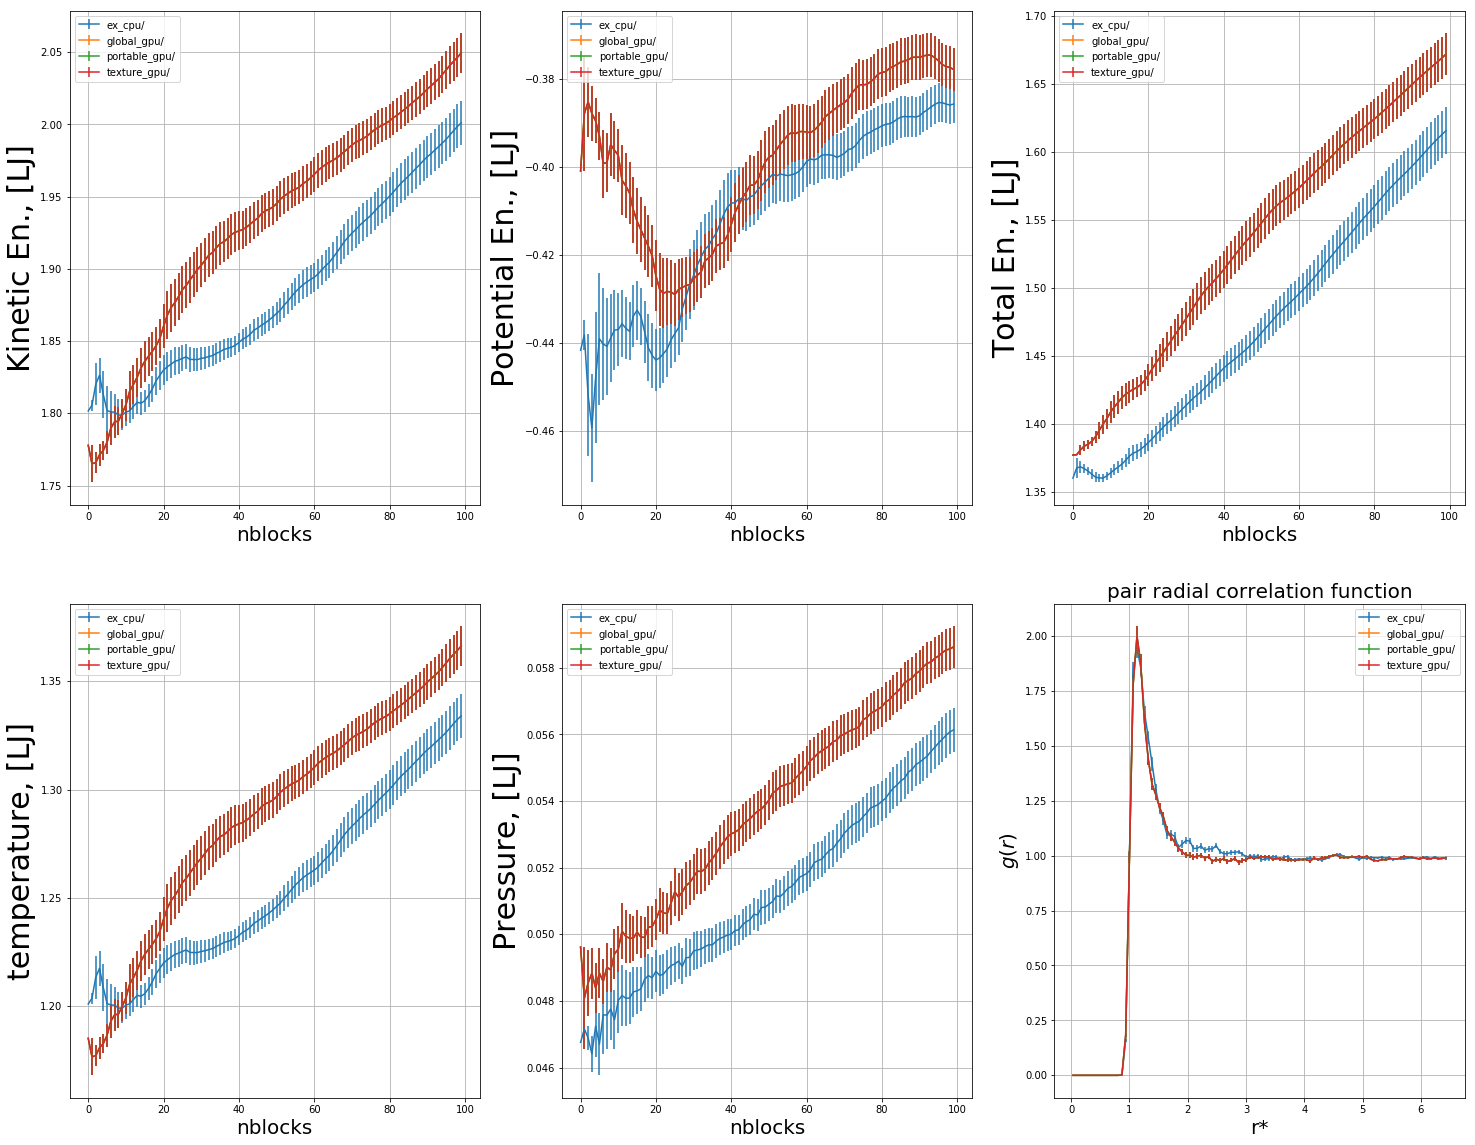

In [15]:
nstep=100000
N=100
x = np.arange(N)

codes = "ex_cpu/","global_gpu/","portable_gpu/","texture_gpu/"
double_codes = "texture_double_precision/",
equilibrium = "raggiungimento_eq/"
phases = "solid/","liquid/","gas/"
files = ["ave_ekin"+str(nstep)+".out","ave_epot"+str(nstep)+".out",
"ave_etot"+str(nstep)+".out","ave_temp"+str(nstep)+".out",
"ave_press"+str(nstep)+".out"]
properties = "kinetic energy","potential energy","total energy","temperature","pressure"
color = "blue","red","orange","green","black"
e_col = "red","blue","green","silver","cyan","ivory","orchid"
y_lab = "Kinetic En., [LJ]","Potential En., [LJ]","Total En., [LJ]","temperature, [LJ]","Pressure, [LJ]"

fig,axs = plt.subplots(nrows=2,ncols=3,figsize=(25,20))

###################### SOLID PHASE ####################################

print("Solid phase")

k=0
for i in range(2):
    for j in range(3):
        if (k==5):
            for l in range(4):
                y = np.loadtxt(codes[l]+phases[0]+"output.gave.out",usecols=(0),unpack='true')
                sum_prog,err_prog = np.loadtxt(codes[l]+phases[0]+"output.gave.out",usecols=(1,2),unpack='true')
                axs[i][j].errorbar(y,sum_prog,yerr=err_prog)
            axs[i][j].set_xlabel("r*",fontsize=20)
            axs[i][j].set_ylabel("$g(r)$",fontsize=20)
            axs[i][j].set_title("pair radial correlation function",fontsize=20)
            axs[i][j].legend(codes)
        else:
            for l in range(4):
                sum_prog,err_prog = np.loadtxt(codes[l]+phases[0]+files[k],usecols=(0,1),delimiter=' ',unpack='true')
                axs[i][j].errorbar(x,sum_prog,yerr=err_prog)
                print(codes[l],": ",properties[k]," ",sum_prog[N-1],"error ",err_prog[N-1])
            print("-------------------------------------------------------------")
            axs[i][j].set_xlabel("nblocks",fontsize=20)
            axs[i][j].set_ylabel(y_lab[k],fontsize=30)
            axs[i][j].legend(codes)
        axs[i][j].grid(True)
        k=k+1
        
plt.show()

fig,axs = plt.subplots(nrows=2,ncols=3,figsize=(25,20))

######################## LIQUID PHASE ##########################################

print("Liquid phase")

k=0
for i in range(2):
    for j in range(3):
        if (k==5):
            for l in range(4):
                y = np.loadtxt(codes[l]+phases[1]+"output.gave.out",usecols=(0),unpack='true')
                sum_prog,err_prog = np.loadtxt(codes[l]+phases[1]+"output.gave.out",usecols=(1,2),unpack='true')
                axs[i][j].errorbar(y,sum_prog,yerr=err_prog)#,color=e_col[1],ecolor=e_col[0])
            axs[i][j].set_xlabel("r*",fontsize=20)
            axs[i][j].set_ylabel("$g(r)$",fontsize=20)
            axs[i][j].set_title("pair radial correlation function",fontsize=20)
            axs[i][j].legend(codes)
        else:
            for l in range(4):
                sum_prog,err_prog = np.loadtxt(codes[l]+phases[1]+files[k],usecols=(0,1),delimiter=' ',unpack='true')
                axs[i][j].errorbar(x,sum_prog,yerr=err_prog)#,color=color[k],ecolor=e_col[1])
                print(codes[l],": ",properties[k]," ",sum_prog[N-1],"error ",err_prog[N-1])
            print("-------------------------------------------------------------")
            axs[i][j].set_xlabel("nblocks",fontsize=20)
            axs[i][j].set_ylabel(y_lab[k],fontsize=30)
            axs[i][j].legend(codes)
        axs[i][j].grid(True)
        k=k+1
        
plt.show()

fig,axs = plt.subplots(nrows=2,ncols=3,figsize=(25,20))

###################################### GAS PHASE ###################################

print("Gas phase")

k=0
for i in range(2):
    for j in range(3):
        if (k==5):
            for l in range(4):
                y = np.loadtxt(codes[l]+phases[2]+"output.gave.out",usecols=(0),unpack='true')
                sum_prog,err_prog = np.loadtxt(codes[l]+phases[2]+"output.gave.out",usecols=(1,2),unpack='true')
                axs[i][j].errorbar(y,sum_prog,yerr=err_prog)#,color=e_col[1],ecolor=e_col[0])
            axs[i][j].set_xlabel("r*",fontsize=20)
            axs[i][j].set_ylabel("$g(r)$",fontsize=20)
            axs[i][j].set_title("pair radial correlation function",fontsize=20)
            axs[i][j].legend(codes)
        else:
            for l in range(4):
                sum_prog,err_prog = np.loadtxt(codes[l]+phases[2]+files[k],usecols=(0,1),delimiter=' ',unpack='true')
                axs[i][j].errorbar(x,sum_prog,yerr=err_prog)#,color=color[k],ecolor=e_col[1])
                print(codes[l],": ",properties[k]," ",sum_prog[N-1],"error ",err_prog[N-1])
            print("-------------------------------------------------------------")
            axs[i][j].set_xlabel("nblocks",fontsize=20)
            axs[i][j].set_ylabel(y_lab[k],fontsize=30)
            axs[i][j].legend(codes)
        axs[i][j].grid(True)
        k=k+1
        
plt.show()

In [16]:
print("we can plot again their difference, just to understand how much they are different")
print("we are not dealing with error difference but just their values")
print("as the results on the gpu are the same for all codes, I will plot the difference between cpu code")
print("and just one of the gpu codes (texture one)")

we can plot again their difference, just to understand how much they are different
we are not dealing with error difference but just their values
as the results on the gpu are the same for all codes, I will plot the difference between cpu code
and just one of the gpu codes (texture one)


Solid phase
-------------------------------------------------------------


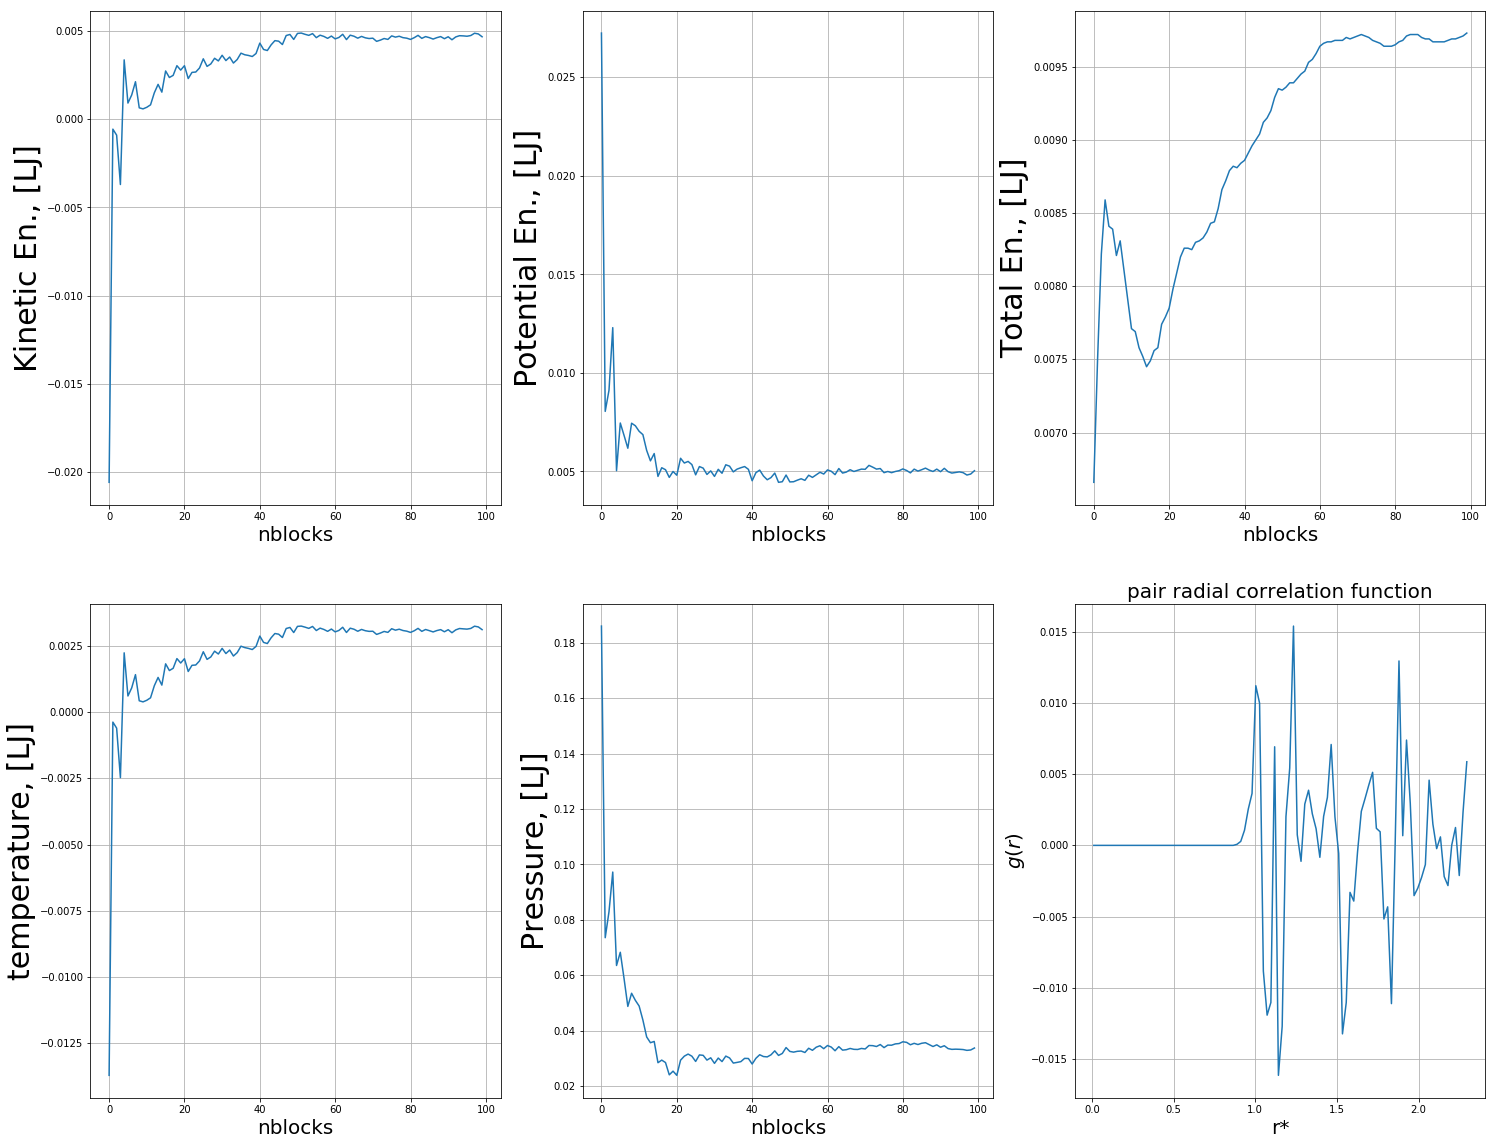

Liquid phase
-------------------------------------------------------------


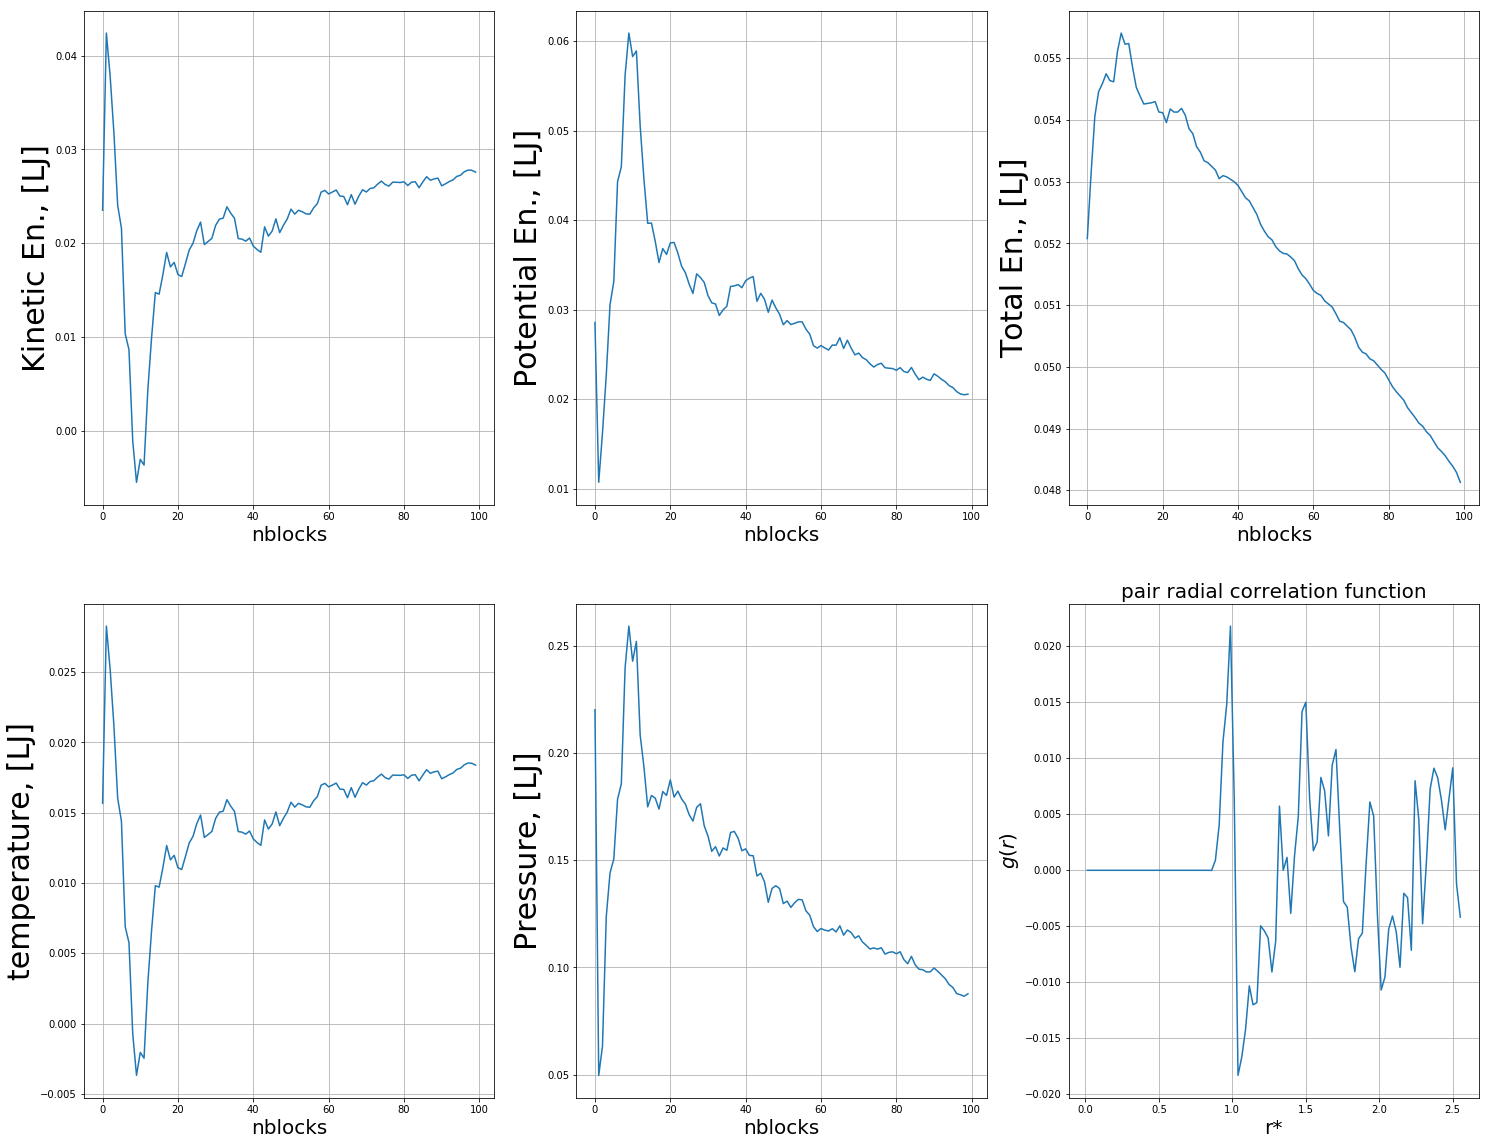

Gas phase
-------------------------------------------------------------


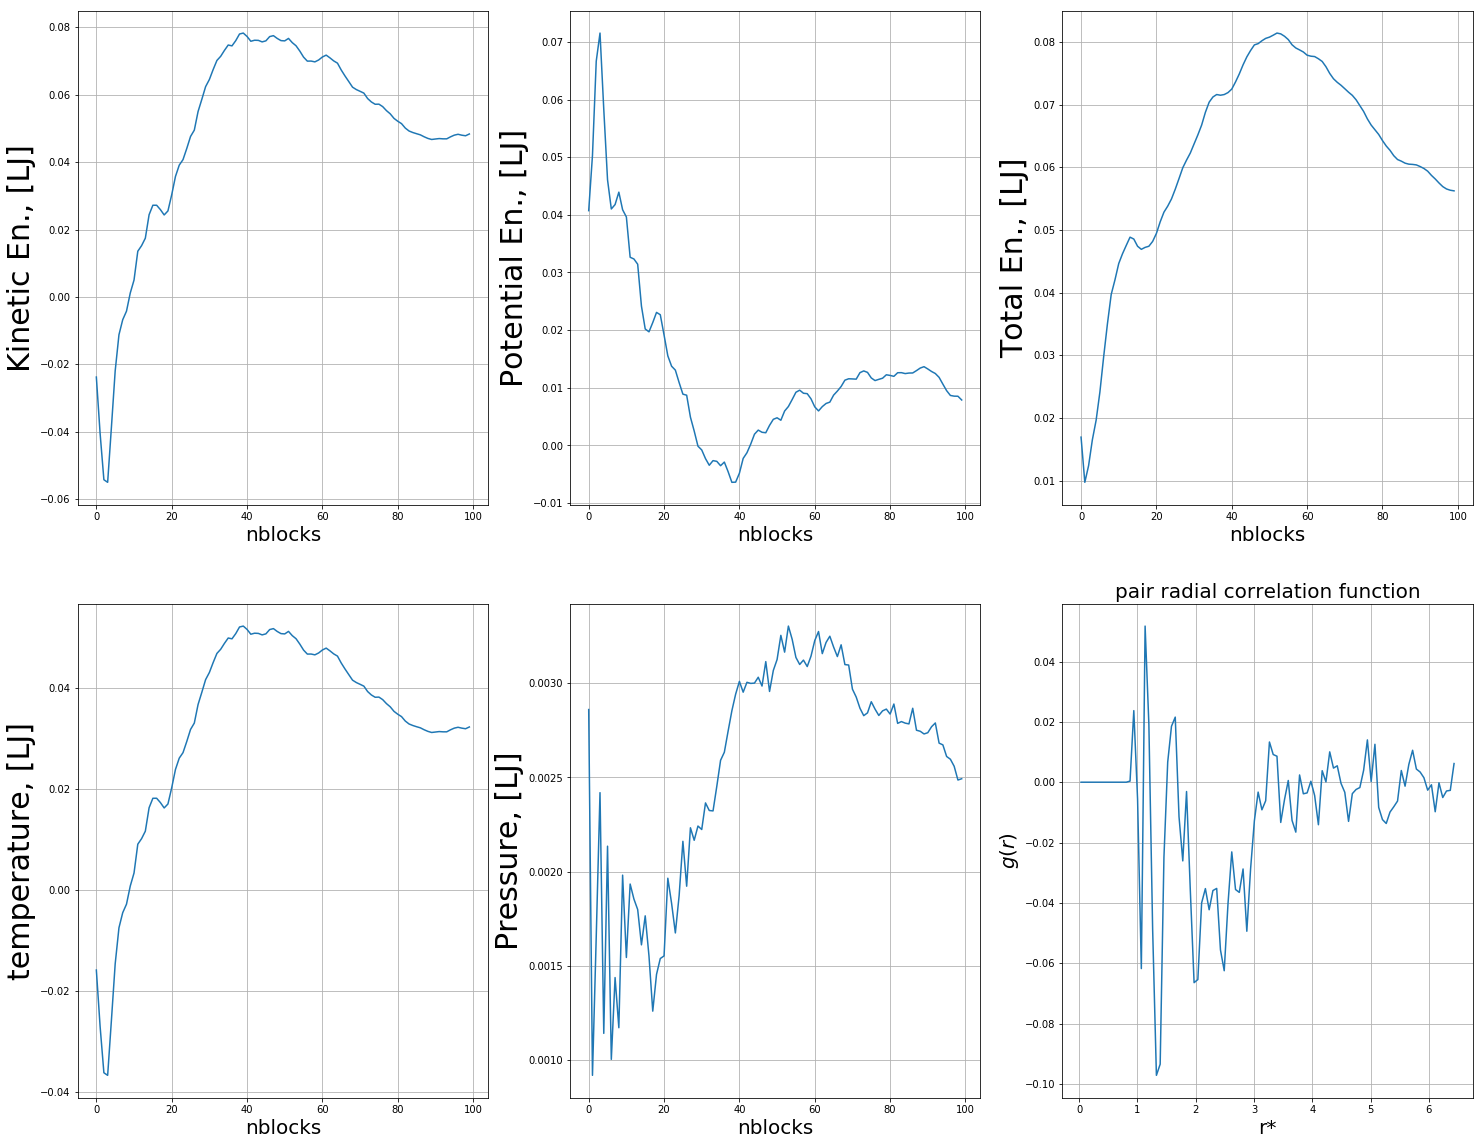

In [17]:
###################### SOLID PHASE ####################################
fig,axs = plt.subplots(nrows=2,ncols=3,figsize=(25,20))

print("Solid phase")

k=0
for i in range(2):
    for j in range(3):
        if (k==5):
            y = np.loadtxt(codes[0]+phases[0]+"output.gave.out",usecols=(0),unpack='true')
            sum_prog0,err_prog0 = np.loadtxt(codes[0]+phases[0]+"output.gave.out",usecols=(1,2),unpack='true')
            sum_prog1,err_prog1 = np.loadtxt(codes[3]+phases[0]+"output.gave.out",usecols=(1,2),unpack='true')    
            axs[i][j].plot(y,sum_prog1-sum_prog0)
            axs[i][j].set_xlabel("r*",fontsize=20)
            axs[i][j].set_ylabel("$g(r)$",fontsize=20)
            axs[i][j].set_title("pair radial correlation function",fontsize=20)
        else:
            sum_prog0,err_prog0 = np.loadtxt(codes[0]+phases[0]+files[k],usecols=(0,1),delimiter=' ',unpack='true')
            sum_prog1,err_prog1 = np.loadtxt(codes[3]+phases[0]+files[k],usecols=(0,1),delimiter=' ',unpack='true')
            axs[i][j].plot(x,sum_prog1-sum_prog0)
            axs[i][j].set_xlabel("nblocks",fontsize=20)
            axs[i][j].set_ylabel(y_lab[k],fontsize=30)
        axs[i][j].grid(True)
        k=k+1
        
print("-------------------------------------------------------------")
plt.show()

fig,axs = plt.subplots(nrows=2,ncols=3,figsize=(25,20))

######################## LIQUID PHASE ##########################################

print("Liquid phase")

k=0
for i in range(2):
    for j in range(3):
        if (k==5):
            y = np.loadtxt(codes[0]+phases[1]+"output.gave.out",usecols=(0),unpack='true')
            sum_prog0,err_prog0 = np.loadtxt(codes[0]+phases[1]+"output.gave.out",usecols=(1,2),unpack='true')
            sum_prog1,err_prog1 = np.loadtxt(codes[3]+phases[1]+"output.gave.out",usecols=(1,2),unpack='true')    
            axs[i][j].plot(y,sum_prog1-sum_prog0)
            axs[i][j].set_xlabel("r*",fontsize=20)
            axs[i][j].set_ylabel("$g(r)$",fontsize=20)
            axs[i][j].set_title("pair radial correlation function",fontsize=20)
        else:
            sum_prog0,err_prog0 = np.loadtxt(codes[0]+phases[1]+files[k],usecols=(0,1),delimiter=' ',unpack='true')
            sum_prog1,err_prog1 = np.loadtxt(codes[3]+phases[1]+files[k],usecols=(0,1),delimiter=' ',unpack='true')
            axs[i][j].plot(x,sum_prog1-sum_prog0)
            axs[i][j].set_xlabel("nblocks",fontsize=20)
            axs[i][j].set_ylabel(y_lab[k],fontsize=30)
        axs[i][j].grid(True)
        k=k+1
        
print("-------------------------------------------------------------")
plt.show()

fig,axs = plt.subplots(nrows=2,ncols=3,figsize=(25,20))

###################################### GAS PHASE ###################################

print("Gas phase")

k=0
for i in range(2):
    for j in range(3):
        if (k==5):
            y = np.loadtxt(codes[0]+phases[2]+"output.gave.out",usecols=(0),unpack='true')
            sum_prog0,err_prog0 = np.loadtxt(codes[0]+phases[2]+"output.gave.out",usecols=(1,2),unpack='true')
            sum_prog1,err_prog1 = np.loadtxt(codes[3]+phases[2]+"output.gave.out",usecols=(1,2),unpack='true')    
            axs[i][j].plot(y,sum_prog1-sum_prog0)
            axs[i][j].set_xlabel("r*",fontsize=20)
            axs[i][j].set_ylabel("$g(r)$",fontsize=20)
            axs[i][j].set_title("pair radial correlation function",fontsize=20)
        else:
            sum_prog0,err_prog0 = np.loadtxt(codes[0]+phases[2]+files[k],usecols=(0,1),delimiter=' ',unpack='true')
            sum_prog1,err_prog1 = np.loadtxt(codes[3]+phases[2]+files[k],usecols=(0,1),delimiter=' ',unpack='true')
            axs[i][j].plot(x,sum_prog1-sum_prog0)
            axs[i][j].set_xlabel("nblocks",fontsize=20)
            axs[i][j].set_ylabel(y_lab[k],fontsize=30)
        axs[i][j].grid(True)
        k=k+1
        
print("-------------------------------------------------------------")
        
plt.show()

In [9]:
print("the second thing to do is understand if we could earn time from these simulations")
print("so in the next step I will plot the time excution in function of particles number")
print("and then I will plot the effiency (time/time) to understand the speedup of the parallel simulation")

the second thing to do is understand if we could earn time from these simulations
so in the next step I will plot the time excution in function of particles number
and then I will plot the effiency (time/time) to understand the speedup of the parallel simulation


simulation of 10'000 steps for solid phase starting from a fcc lattice configure
-------------------------------------------------------------


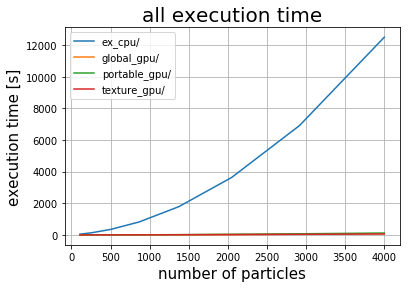

-------------------------------------------------------------


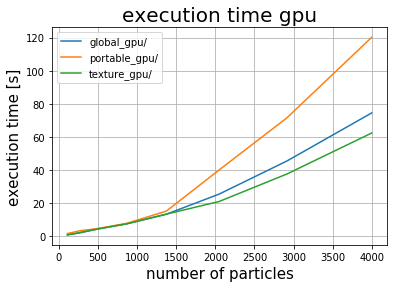

execution time for cpu in seconds: [   46.2    135.87   347.48   818.04  1784.69  3631.75  6914.36 12497.6 ]
################################################
execution time for gpu global_gpu/  in sec: [ 0.909364  1.96852   4.42122   7.51671  13.3001   25.4707   45.4942
 74.5407  ]
speedup for  global_gpu/  :  [ 50.80473826  69.02139679  78.59369133 108.82952781 134.18620913
 142.58540205 151.98332974 167.66142523]
################################################
################################################
execution time for gpu portable_gpu/  in sec: [  1.63053   3.23924   4.72521   7.80679  15.1742   40.0594   71.5946
 120.223  ]
speedup for  portable_gpu/  :  [ 28.33434527  41.94502414  73.53747241 104.78570578 117.61344914
  90.65912121  96.57655745 103.95348644]
################################################
################################################
execution time for gpu texture_gpu/  in sec: [ 0.820475  2.16384   4.4521    7.48976  13.3626   21.0009   37.6446
 62.4

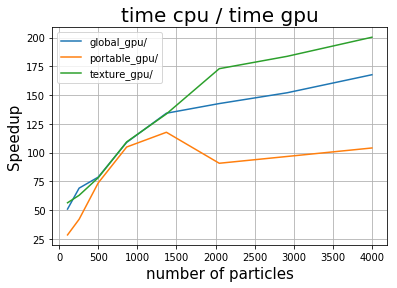

In [18]:
simulationtime = ["simulation_cpu.time","simulation_global.time","simulation_portable.time"
,"simulation_texture.time"]

print("simulation of 10'000 steps for solid phase starting from a fcc lattice configure")

codes = "ex_cpu/","global_gpu/","portable_gpu/","texture_gpu/"

for j in range(4):
        x,time = np.loadtxt(simulationtime[j],usecols=(0,1),unpack='true')
        time = time/1000 #in second
        plt.plot(x,time)
        plt.xlabel("number of particles",fontsize=15)
        plt.ylabel("execution time [s]",fontsize=15)
        plt.legend(codes)
        plt.title("all execution time",fontsize=20)
        plt.grid(True)
        
print("-------------------------------------------------------------")
    
plt.show()

codes = "global_gpu/","portable_gpu/","texture_gpu/"

for j in range(3):
        x,time = np.loadtxt(simulationtime[j+1],usecols=(0,1),unpack='true')
        time = time/1000 #in second
        plt.plot(x,time)
        plt.xlabel("number of particles",fontsize=15)
        plt.ylabel("execution time [s]",fontsize=15)
        plt.legend(codes)
        plt.title("execution time gpu",fontsize=20)
        plt.grid(True)
        
print("-------------------------------------------------------------")
    
plt.show()
    
x,time0 = np.loadtxt(simulationtime[0],usecols=(0,1),unpack='true')
time0 = time0/1000

print("execution time for cpu in seconds:",time0)

for j in range(3):
        x,time = np.loadtxt(simulationtime[j+1],usecols=(0,1),unpack='true')
        time = time/1000 #in second
        print("################################################")
        print("execution time for gpu", codes[j], " in sec:",time)
        speedup = time0/time
        print("speedup for ",codes[j]," : ",speedup)
        print("################################################")
        plt.plot(x,speedup)
        plt.xlabel("number of particles",fontsize=15)
        plt.ylabel("Speedup",fontsize=15)
        plt.title("time cpu / time gpu",fontsize=20)
        plt.legend(codes)
        plt.grid(True)

plt.show()

In [19]:
print("for the calculus I've used a specific configure for number of blocks and threads per block")

for the calculus I've used a specific configure for number of blocks and threads per block


In [20]:
print("let's have a look to the double precision codes")

let's have a look to the double precision codes


cpu code, double point precision


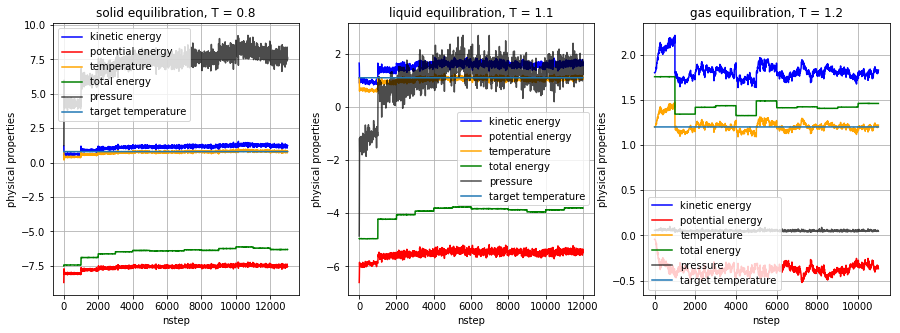

gpu code texture memory, double point precision


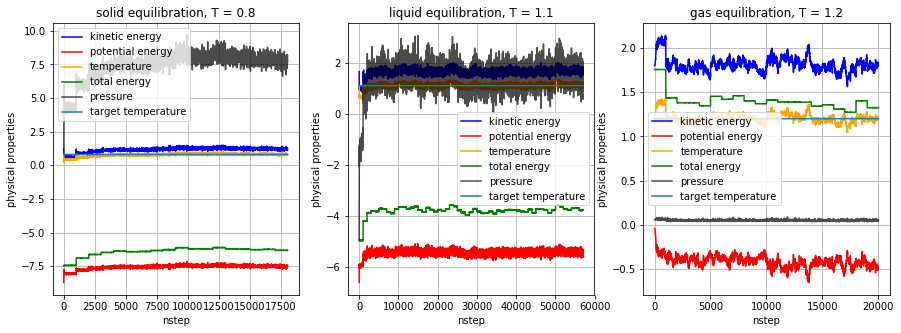

In [25]:
double_codes = "ex_cpu_double/","texture_double_precision/"
nstep=10000
equilibrium = "raggiungimento_eq/"
phases = "solid/","liquid/","gas/"
files = ["output_ekin"+str(nstep)+".dat","output_epot"+str(nstep)+".dat",
"output_temp"+str(nstep)+".dat","output_etot"+str(nstep)+".dat",
"output_press"+str(nstep)+".dat"]
temperature = 0.8,1.1,1.2
properties = "kinetic energy","potential energy","temperature","total energy","pressure","target temperature"
title = "solid equilibration","liquid equilibration","gas equilibration"
color = "blue","red","orange","green","black"

print("cpu code, double point precision")    
fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(15, 5))

for j in range(3):
    for i in range(5):
        val = np.loadtxt(double_codes[0]+equilibrium+phases[j]+files[i],usecols=(0),delimiter=' ',unpack='true')
        if (i == 4):
            axs[j].plot(val,color=color[i],alpha=0.7)
        else:
            axs[j].plot(val,color=color[i])
        axs[j].set_ylabel("physical properties")
        axs[j].set_xlabel("nstep")
    y = np.full(len(val),temperature[j])
    x = np.arange(len(val))
    axs[j].plot(x,y)
    axs[j].grid(True)
    axs[j].set_title(title[j]+f", T = {temperature[j]}")
    axs[j].legend(properties)
    
plt.show()

print("gpu code texture memory, double point precision")    

fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(15, 5))

for j in range(3):
    for i in range(5):
        val = np.loadtxt(double_codes[1]+equilibrium+phases[j]+files[i],usecols=(0),delimiter=' ',unpack='true')
        if (i == 4):
            axs[j].plot(val,color=color[i],alpha=0.7)
        else:
            axs[j].plot(val,color=color[i])
        axs[j].set_ylabel("physical properties")
        axs[j].set_xlabel("nstep")
    y = np.full(len(val),temperature[j])
    x = np.arange(len(val))
    axs[j].plot(x,y)
    axs[j].grid(True)
    axs[j].set_title(title[j]+f", T = {temperature[j]}")
    axs[j].legend(properties)
    
plt.show()

the precision in the device calculus is different from that of the cpu
this is why the equilibration phases are different
plotting together the istantaneaous values of temperature


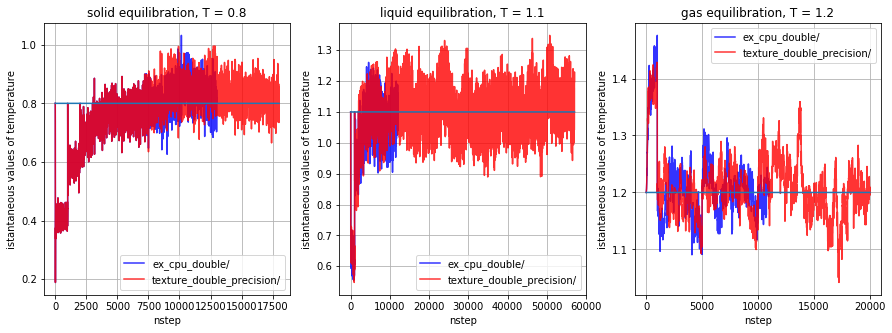

In [26]:
print("the precision in the device calculus is different from that of the cpu")
print("this is why the equilibration phases are different")
print("plotting together the istantaneaous values of temperature")

fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(15, 5))

for j in range(3):
    for i in range(2):
        val = np.loadtxt(double_codes[i]+equilibrium+phases[j]+files[2],usecols=(0),delimiter=' ',unpack='true')
        if i==3:
            axs[j].plot(val,color=color[i],alpha=0.4)
        elif i==2:
            axs[j].plot(val,color=color[i],alpha=0.5)
        else:
            axs[j].plot(val,color=color[i],alpha=0.8)
        axs[j].set_ylabel("istantaneous values of temperature")
        axs[j].set_xlabel("nstep")
    y = np.full(len(val),temperature[j])
    x = np.arange(len(val))
    axs[j].plot(x,y)
    axs[j].grid(True)
    axs[j].set_title(title[j]+f", T = {temperature[j]}")
    axs[j].legend(double_codes)
    
plt.show()

In [27]:
print("we see that, as expected, the precision in gpu device is better than cpu code for simple operations")
print("this is in accordance with the fact that gpu code needs more steps to really equilibrate")

we see that, as expected, the precision in gpu device is better than cpu code for simple operations
this is in accordance with the fact that gpu code needs more steps to really equilibrate


try to plot their difference respect to the cpu code


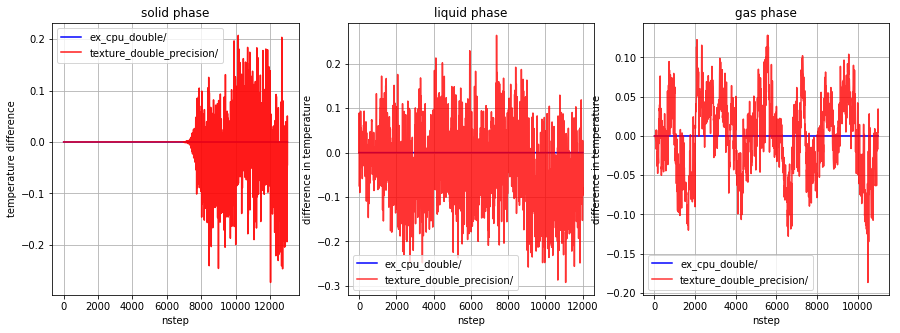

In [28]:
print("try to plot their difference respect to the cpu code")

codes = "ex_cpu/","global_gpu/","portable_gpu/","texture_gpu/"

fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(15, 5))

#### solid #####

temp0 = np.loadtxt(double_codes[0]+equilibrium+phases[0]+files[2],usecols=(0),delimiter=' ',unpack='true')
temp1 = np.loadtxt(double_codes[1]+equilibrium+phases[0]+files[2],usecols=(0),delimiter=' ',unpack='true')
temp1 = temp0-temp1[0:len(temp0)]
#temp1 = temp0[0:len(temp1)]-temp1
temp0=temp0-temp0

axs[0].plot(temp0,color=color[0],alpha=1)
axs[0].plot(temp1,color=color[1],alpha=0.9)
axs[0].grid(True)
axs[0].set_ylabel("temperature difference")
axs[0].set_xlabel("nstep")
axs[0].set_title("solid phase")
axs[0].legend(double_codes)


#### liquid #####

temp0 = np.loadtxt(double_codes[0]+equilibrium+phases[1]+files[2],usecols=(0),delimiter=' ',unpack='true')
temp1 = np.loadtxt(double_codes[1]+equilibrium+phases[1]+files[2],usecols=(0),delimiter=' ',unpack='true')
temp1 = temp0-temp1[0:len(temp0)]
#temp1 = temp0[0:len(temp1)]-temp1
temp0 = temp0-temp0

axs[1].plot(temp0,color=color[0],alpha=1)
axs[1].plot(temp1,color=color[1],alpha=0.8)
axs[1].grid(True)
axs[1].set_ylabel("difference in temperature")
axs[1].set_xlabel("nstep")
axs[1].set_title("liquid phase")
axs[1].legend(double_codes)


#### gas #####

temp0 = np.loadtxt(double_codes[0]+equilibrium+phases[2]+files[2],usecols=(0),delimiter=' ',unpack='true')
temp1 = np.loadtxt(double_codes[1]+equilibrium+phases[2]+files[2],usecols=(0),delimiter=' ',unpack='true')
temp1 = temp0-temp1[0:len(temp0)]
temp0 = temp0-temp0

axs[2].plot(temp0,color=color[0],alpha=1)
axs[2].plot(temp1,color=color[1],alpha=0.8)
axs[2].grid(True)
axs[2].set_ylabel("difference in temperature")
axs[2].set_xlabel("nstep")
axs[2].set_title("gas phase")
axs[2].legend(double_codes)


plt.show()

In [29]:
print("but this is just the equilibration.. so the most important thing is comparing a single simulation after")
print("reached the target temperature")
print("so now I will show some results after this equilibration phase with the corresping values for:" )
print("----------------------------------------------------------------------------------------------")
print("- total energy","- kinetic energy","- potential energy","- pressure","- temperature","- pair correlation function g(r)",sep="\n")

but this is just the equilibration.. so the most important thing is comparing a single simulation after
reached the target temperature
so now I will show some results after this equilibration phase with the corresping values for:
----------------------------------------------------------------------------------------------
- total energy
- kinetic energy
- potential energy
- pressure
- temperature
- pair correlation function g(r)


Solid phase
ex_cpu/ :  kinetic energy   1.2021 error  0.000714235
global_gpu/ :  kinetic energy   1.19933 error  0.000740942
-------------------------------------------------------------
ex_cpu/ :  potential energy   -7.52316 error  0.000740287
global_gpu/ :  potential energy   -7.52542 error  0.000763392
-------------------------------------------------------------
ex_cpu/ :  total energy   -6.32106 error  8.00702e-05
global_gpu/ :  total energy   -6.32608 error  8.36797e-05
-------------------------------------------------------------
ex_cpu/ :  temperature   0.801399 error  0.000476157
global_gpu/ :  temperature   0.799555 error  0.000493961
-------------------------------------------------------------
ex_cpu/ :  pressure   7.72027 error  0.00376931
global_gpu/ :  pressure   7.70832 error  0.00369657
-------------------------------------------------------------


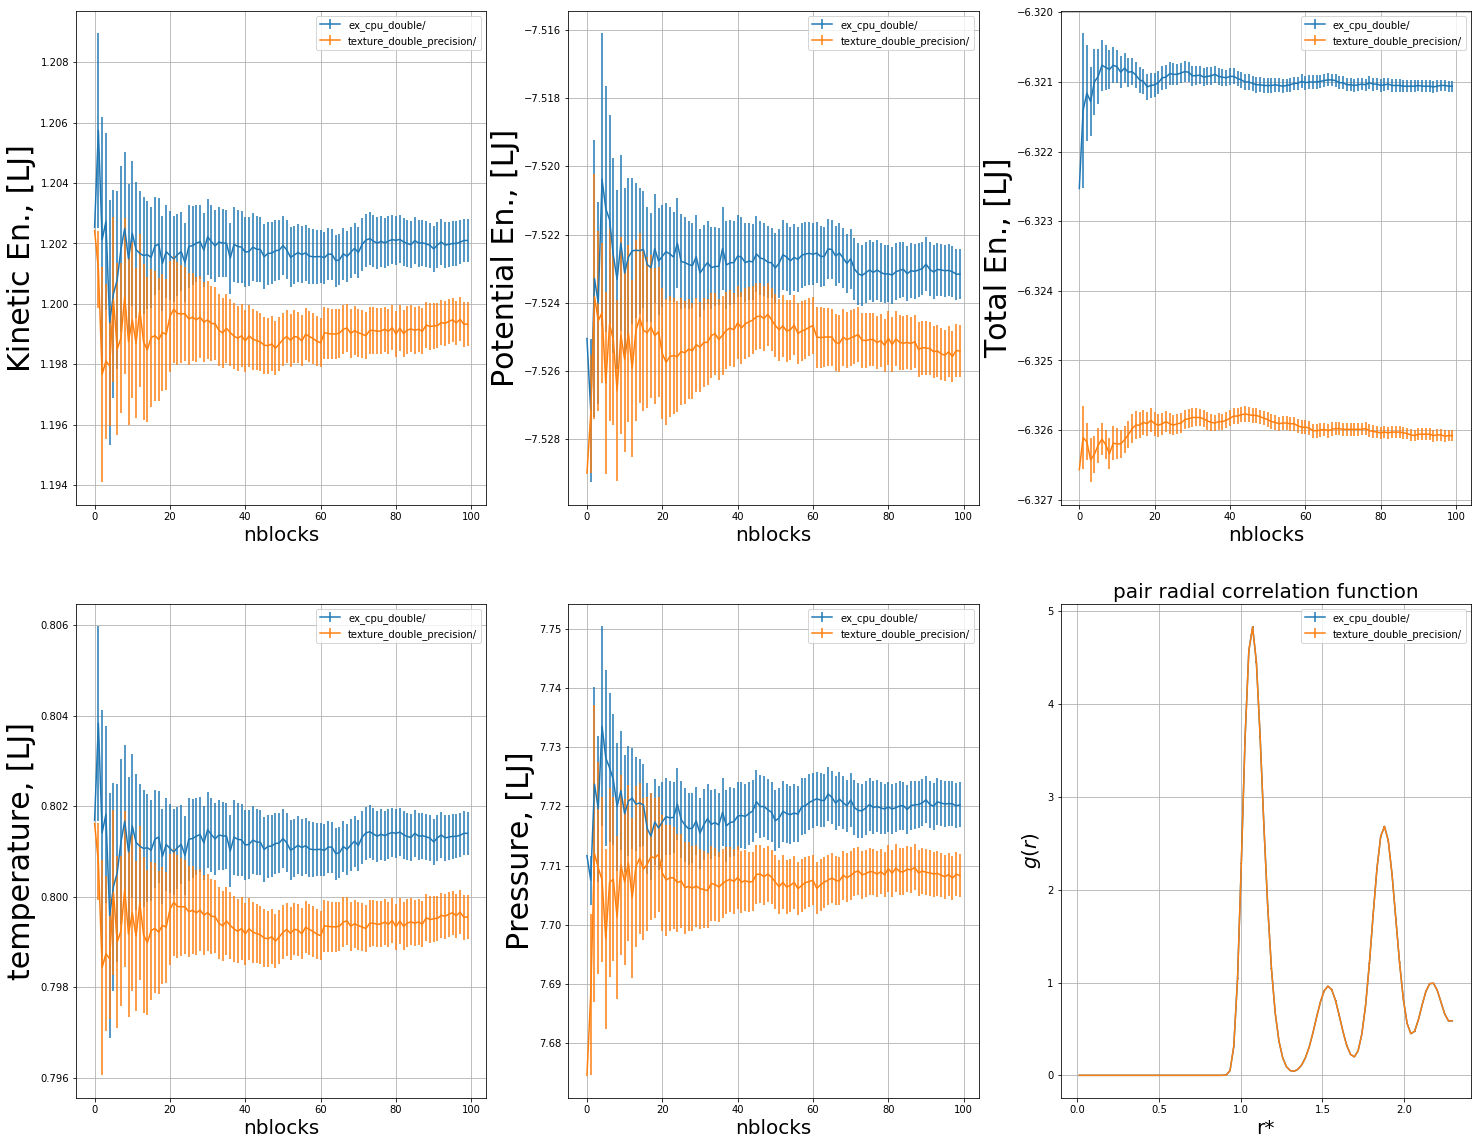

Liquid phase
ex_cpu/ :  kinetic energy   1.64995 error  0.00275822
global_gpu/ :  kinetic energy   1.65324 error  0.00287267
-------------------------------------------------------------
ex_cpu/ :  potential energy   -5.44759 error  0.00283927
global_gpu/ :  potential energy   -5.44516 error  0.00290826
-------------------------------------------------------------
ex_cpu/ :  total energy   -3.79764 error  0.000168192
global_gpu/ :  total energy   -3.79192 error  0.000143799
-------------------------------------------------------------
ex_cpu/ :  temperature   1.09996 error  0.00183881
global_gpu/ :  temperature   1.10216 error  0.00191512
-------------------------------------------------------------
ex_cpu/ :  pressure   1.47295 error  0.0167198
global_gpu/ :  pressure   1.48604 error  0.0141394
-------------------------------------------------------------


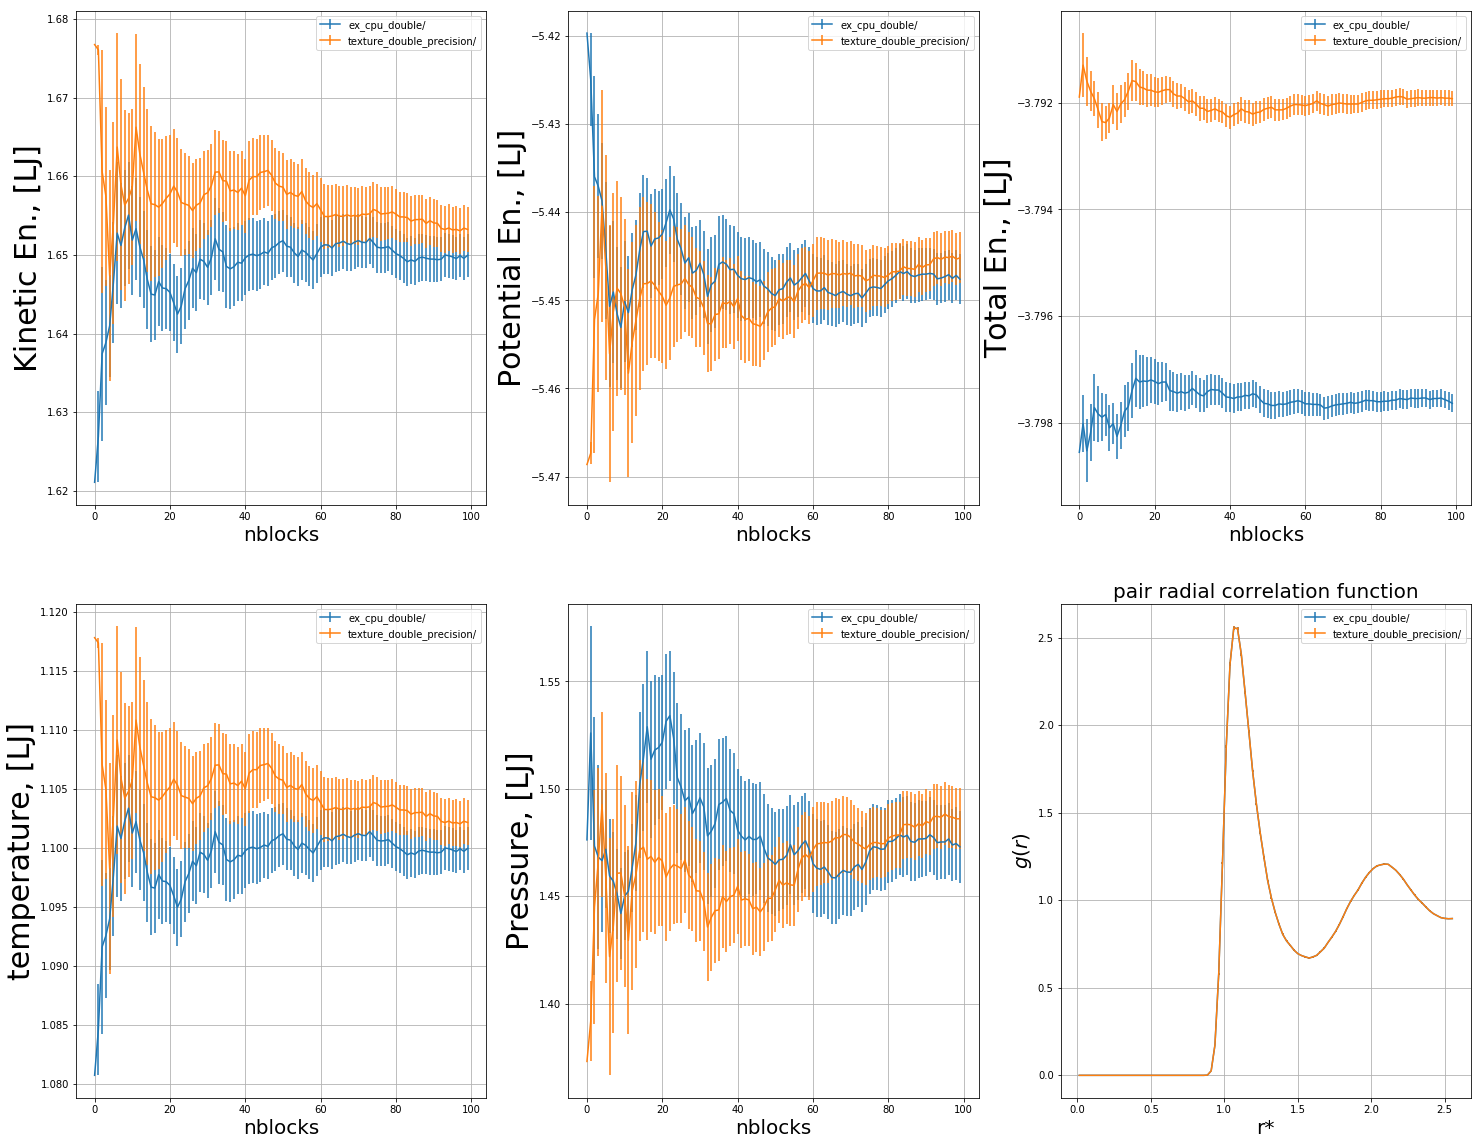

Gas phase
ex_cpu/ :  kinetic energy   1.85679 error  0.00445675
global_gpu/ :  kinetic energy   1.78644 error  0.0037645
-------------------------------------------------------------
ex_cpu/ :  potential energy   -0.396818 error  0.00446001
global_gpu/ :  potential energy   -0.461937 error  0.00376694
-------------------------------------------------------------
ex_cpu/ :  total energy   1.45997 error  8.70665e-06
global_gpu/ :  total energy   1.3245 error  1.22807e-05
-------------------------------------------------------------
ex_cpu/ :  temperature   1.23786 error  0.00297117
global_gpu/ :  temperature   1.19096 error  0.00250967
-------------------------------------------------------------
ex_cpu/ :  pressure   0.0514349 error  0.000314033
global_gpu/ :  pressure   0.0471132 error  0.000319431
-------------------------------------------------------------


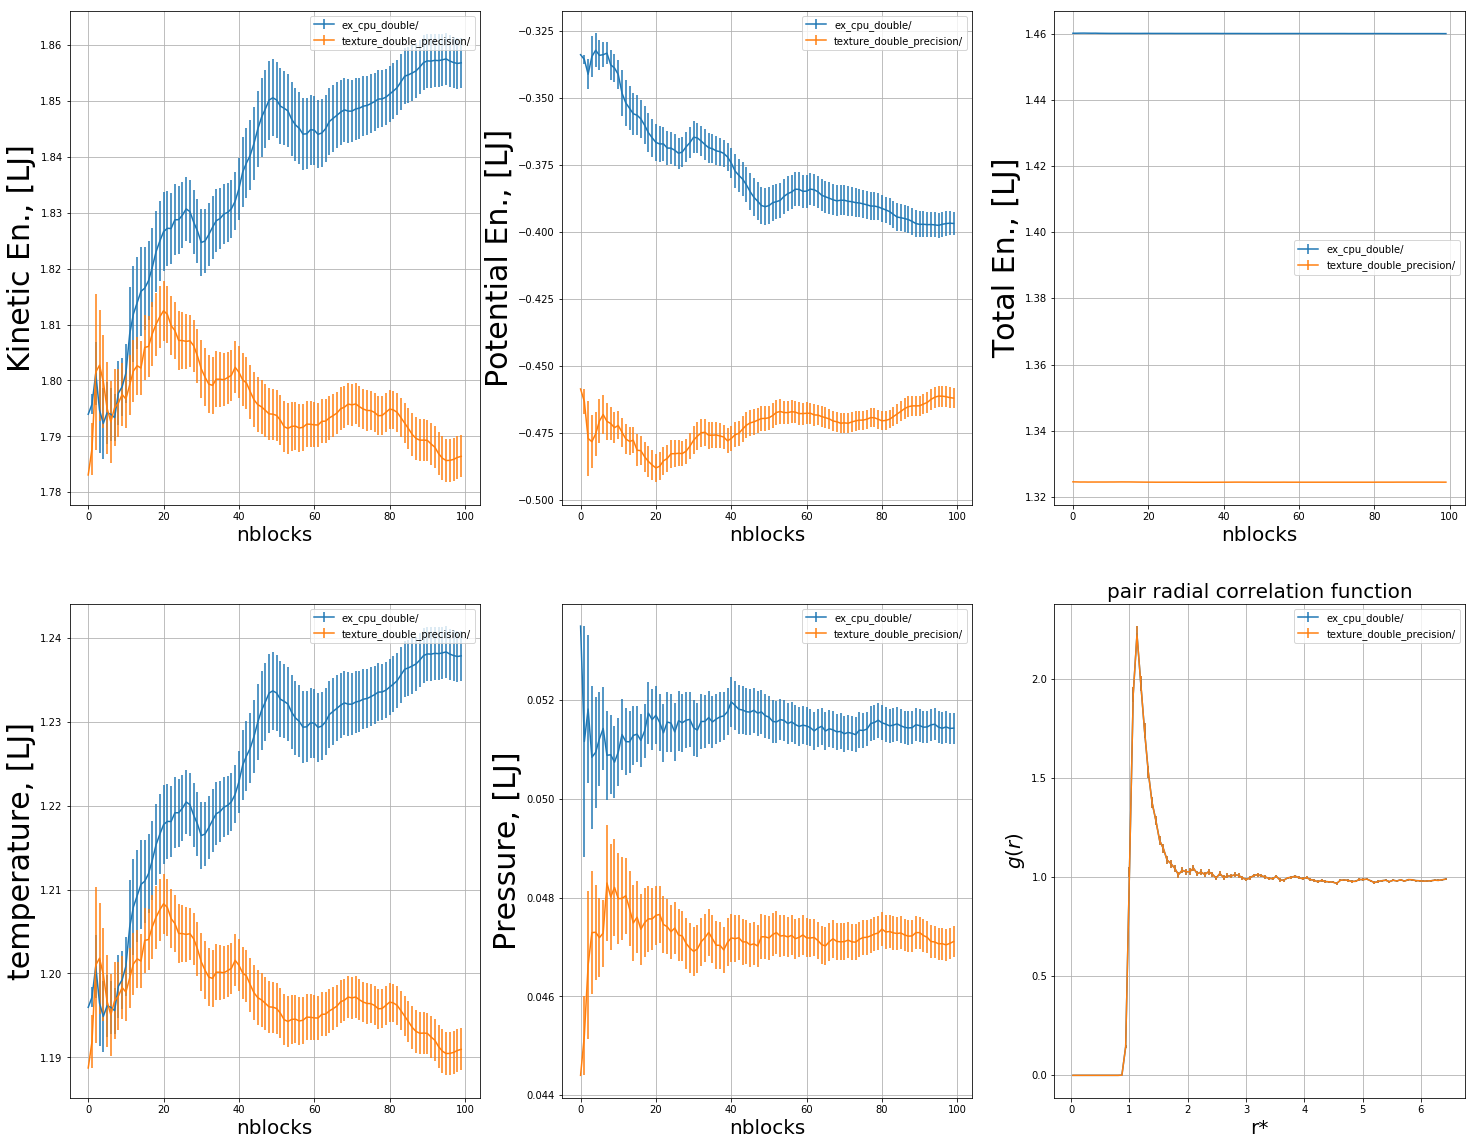

In [31]:
nstep=100000
N=100
x = np.arange(N)

#codes = "ex_cpu/","global_gpu/","portable_gpu/","texture_gpu/"
#double_codes = "texture_double_precision/",
#equilibrium = "raggiungimento_eq/"
phases = "solid/","liquid/","gas/"
files = ["ave_ekin"+str(nstep)+".out","ave_epot"+str(nstep)+".out",
"ave_etot"+str(nstep)+".out","ave_temp"+str(nstep)+".out",
"ave_press"+str(nstep)+".out"]
properties = "kinetic energy","potential energy","total energy","temperature","pressure"
color = "blue","red","orange","green","black"
e_col = "red","blue","green","silver","cyan","ivory","orchid"
y_lab = "Kinetic En., [LJ]","Potential En., [LJ]","Total En., [LJ]","temperature, [LJ]","Pressure, [LJ]"

fig,axs = plt.subplots(nrows=2,ncols=3,figsize=(25,20))

###################### SOLID PHASE ####################################

print("Solid phase")

k=0
for i in range(2):
    for j in range(3):
        if (k==5):
            for l in range(2):
                y = np.loadtxt(double_codes[l]+phases[0]+"output.gave.out",usecols=(0),unpack='true')
                sum_prog,err_prog = np.loadtxt(double_codes[0]+phases[0]+"output.gave.out",usecols=(1,2),unpack='true')
                axs[i][j].errorbar(y,sum_prog,yerr=err_prog)
            axs[i][j].set_xlabel("r*",fontsize=20)
            axs[i][j].set_ylabel("$g(r)$",fontsize=20)
            axs[i][j].set_title("pair radial correlation function",fontsize=20)
            axs[i][j].legend(double_codes)
        else:
            for l in range(2):
                sum_prog,err_prog = np.loadtxt(double_codes[l]+phases[0]+files[k],usecols=(0,1),delimiter=' ',unpack='true')
                axs[i][j].errorbar(x,sum_prog,yerr=err_prog)
                print(codes[l],": ",properties[k]," ",sum_prog[N-1],"error ",err_prog[N-1])
            print("-------------------------------------------------------------")
            axs[i][j].set_xlabel("nblocks",fontsize=20)
            axs[i][j].set_ylabel(y_lab[k],fontsize=30)
            axs[i][j].legend(double_codes)
        axs[i][j].grid(True)
        k=k+1
        
plt.show()

fig,axs = plt.subplots(nrows=2,ncols=3,figsize=(25,20))

######################## LIQUID PHASE ##########################################

print("Liquid phase")

k=0
for i in range(2):
    for j in range(3):
        if (k==5):
            for l in range(2):
                y = np.loadtxt(double_codes[l]+phases[1]+"output.gave.out",usecols=(0),unpack='true')
                sum_prog,err_prog = np.loadtxt(double_codes[0]+phases[1]+"output.gave.out",usecols=(1,2),unpack='true')
                axs[i][j].errorbar(y,sum_prog,yerr=err_prog)#,color=e_col[1],ecolor=e_col[0])
            axs[i][j].set_xlabel("r*",fontsize=20)
            axs[i][j].set_ylabel("$g(r)$",fontsize=20)
            axs[i][j].set_title("pair radial correlation function",fontsize=20)
            axs[i][j].legend(double_codes)
        else:
            for l in range(2):
                sum_prog,err_prog = np.loadtxt(double_codes[l]+phases[1]+files[k],usecols=(0,1),delimiter=' ',unpack='true')
                axs[i][j].errorbar(x,sum_prog,yerr=err_prog)#,color=color[k],ecolor=e_col[1])
                print(codes[l],": ",properties[k]," ",sum_prog[N-1],"error ",err_prog[N-1])
            print("-------------------------------------------------------------")
            axs[i][j].set_xlabel("nblocks",fontsize=20)
            axs[i][j].set_ylabel(y_lab[k],fontsize=30)
            axs[i][j].legend(double_codes)
        axs[i][j].grid(True)
        k=k+1
        
plt.show()

fig,axs = plt.subplots(nrows=2,ncols=3,figsize=(25,20))

###################################### GAS PHASE ###################################

print("Gas phase")

k=0
for i in range(2):
    for j in range(3):
        if (k==5):
            for l in range(2):
                y = np.loadtxt(double_codes[l]+phases[2]+"output.gave.out",usecols=(0),unpack='true')
                sum_prog,err_prog = np.loadtxt(double_codes[0]+phases[2]+"output.gave.out",usecols=(1,2),unpack='true')
                axs[i][j].errorbar(y,sum_prog,yerr=err_prog)#,color=e_col[1],ecolor=e_col[0])
            axs[i][j].set_xlabel("r*",fontsize=20)
            axs[i][j].set_ylabel("$g(r)$",fontsize=20)
            axs[i][j].set_title("pair radial correlation function",fontsize=20)
            axs[i][j].legend(double_codes)
        else:
            for l in range(2):
                sum_prog,err_prog = np.loadtxt(double_codes[l]+phases[2]+files[k],usecols=(0,1),delimiter=' ',unpack='true')
                axs[i][j].errorbar(x,sum_prog,yerr=err_prog)#,color=color[k],ecolor=e_col[1])
                print(codes[l],": ",properties[k]," ",sum_prog[N-1],"error ",err_prog[N-1])
            print("-------------------------------------------------------------")
            axs[i][j].set_xlabel("nblocks",fontsize=20)
            axs[i][j].set_ylabel(y_lab[k],fontsize=30)
            axs[i][j].legend(double_codes)
        axs[i][j].grid(True)
        k=k+1
        
plt.show()

Solid phase
-------------------------------------------------------------


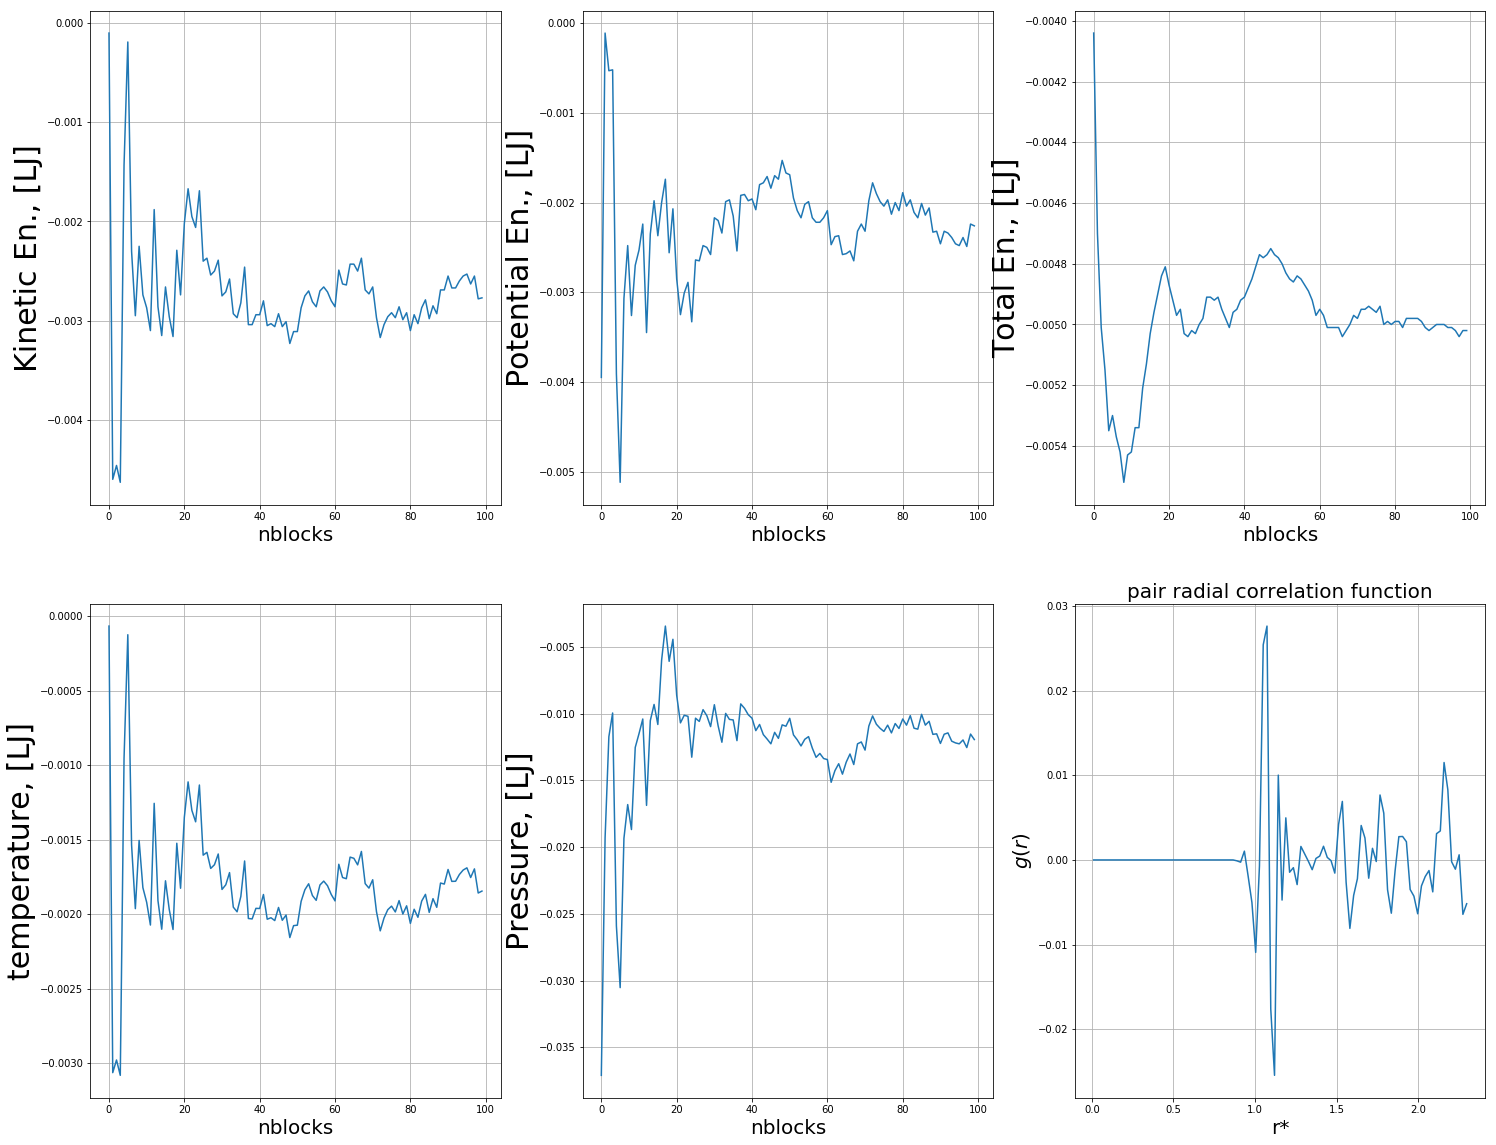

Liquid phase
-------------------------------------------------------------


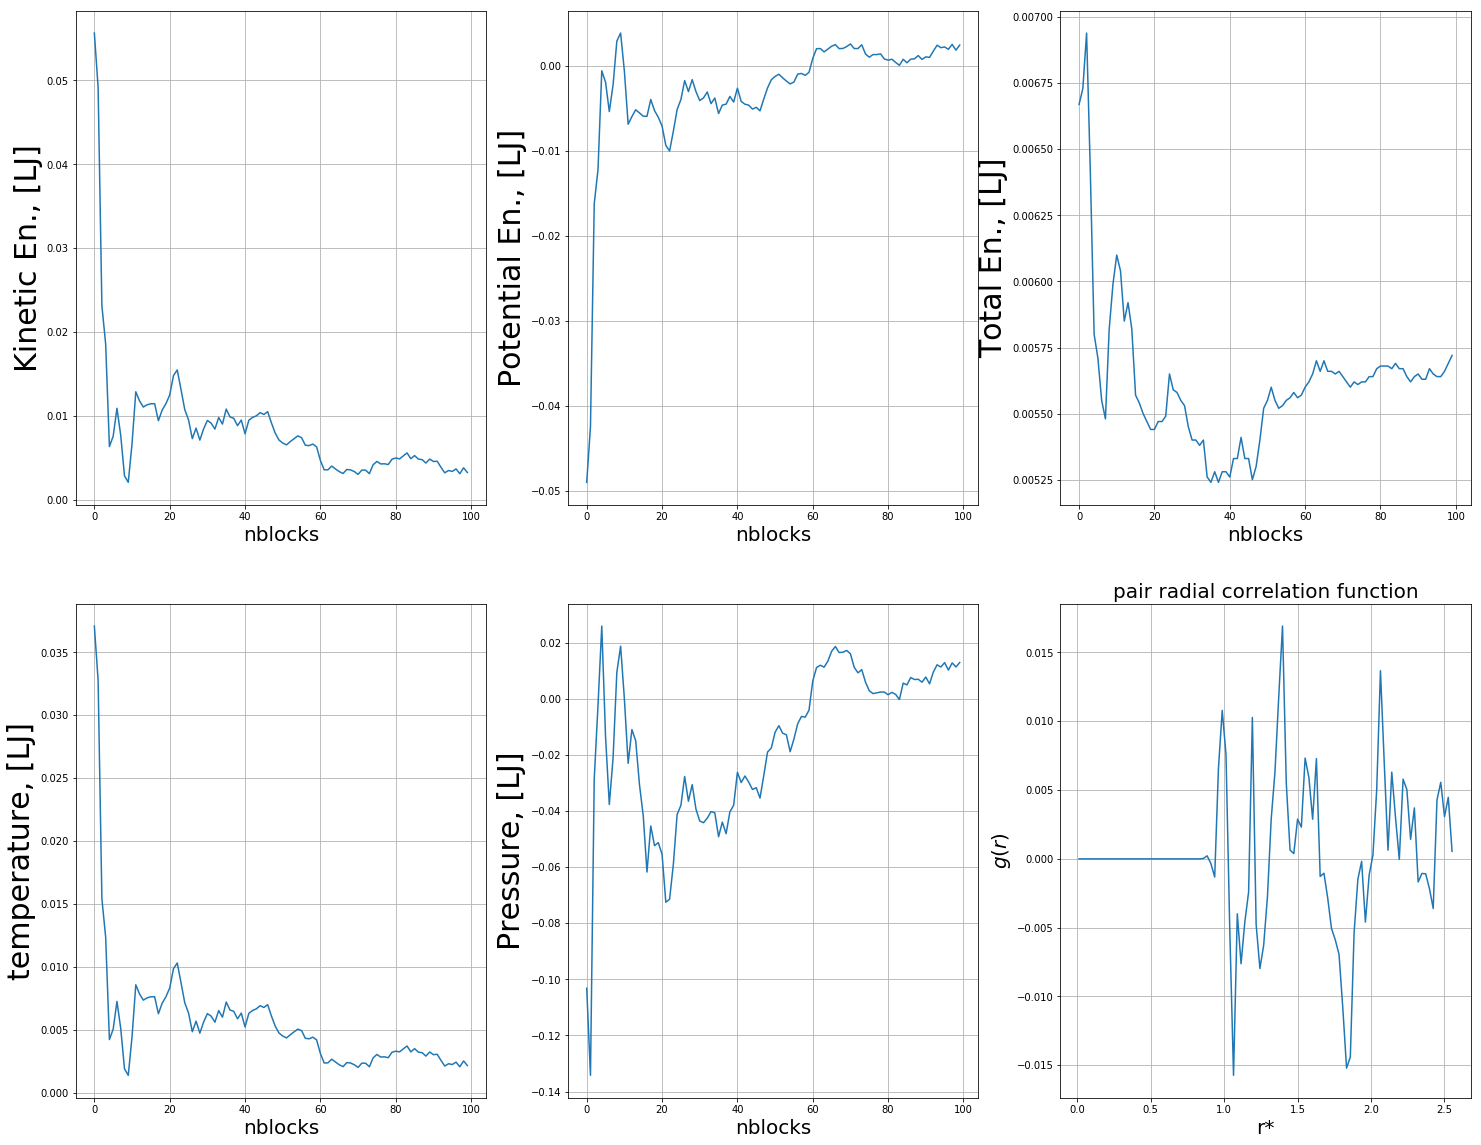

Gas phase
-------------------------------------------------------------


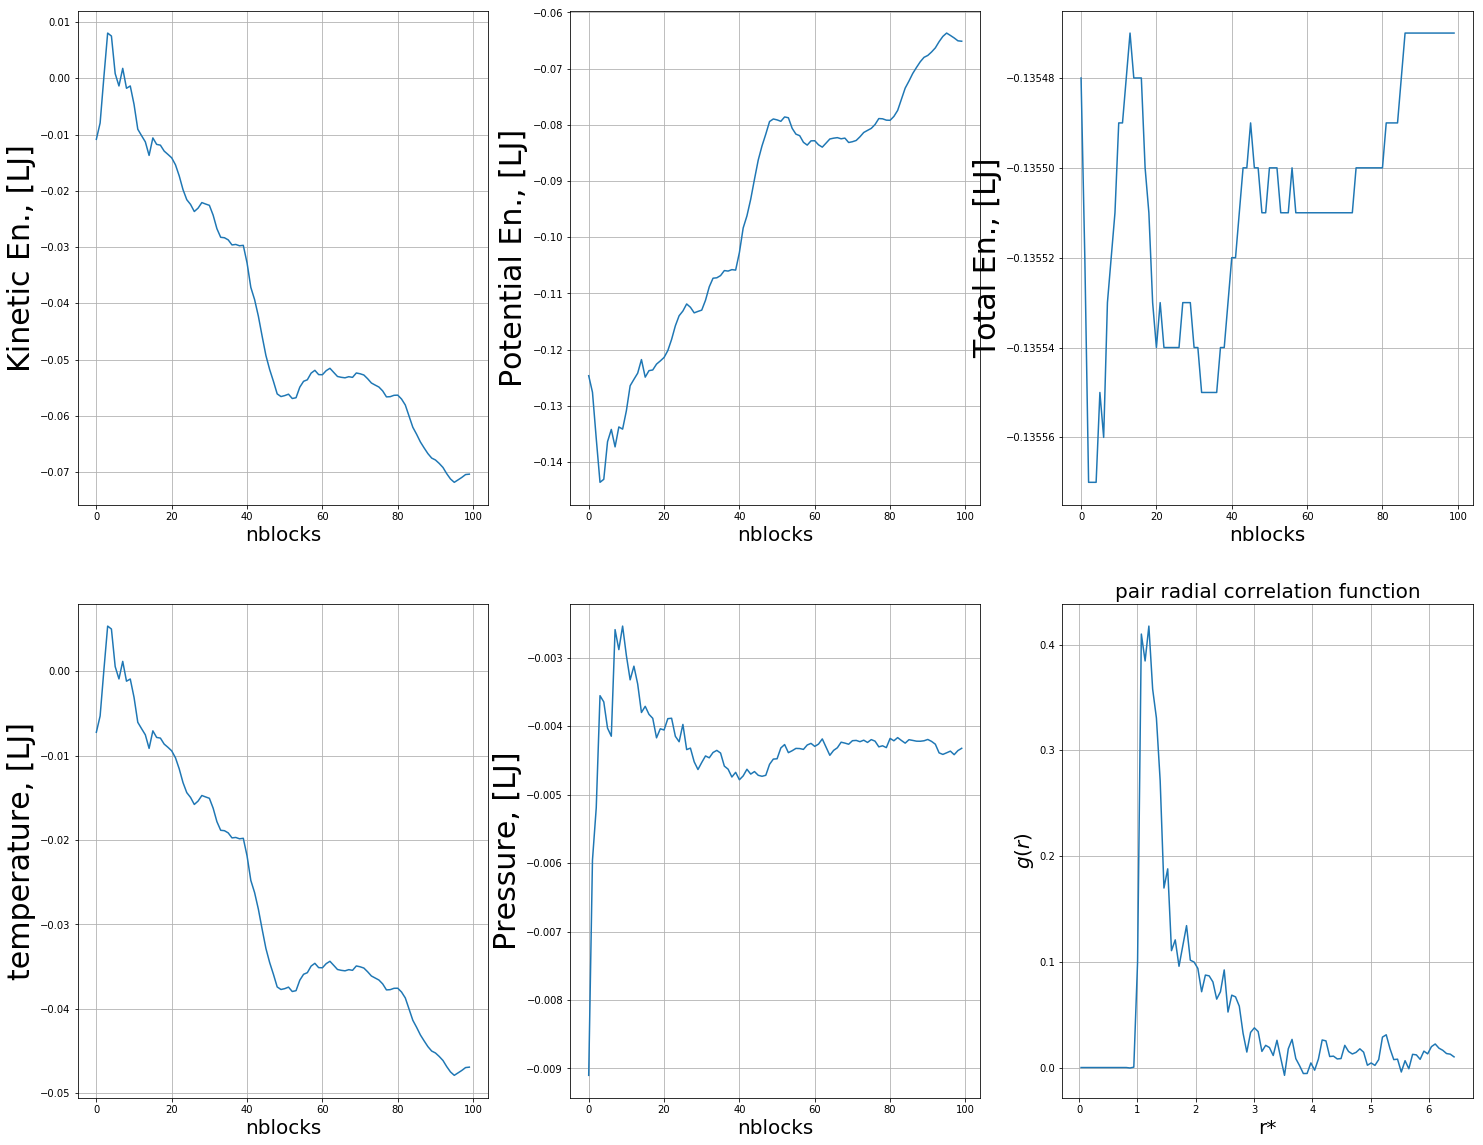

In [33]:
fig,axs = plt.subplots(nrows=2,ncols=3,figsize=(25,20))

print("Solid phase")

k=0
for i in range(2):
    for j in range(3):
        if (k==5):
            y = np.loadtxt(double_codes[0]+phases[0]+"output.gave.out",usecols=(0),unpack='true')
            sum_prog0,err_prog0 = np.loadtxt(double_codes[0]+phases[0]+"output.gave.out",usecols=(1,2),unpack='true')
            sum_prog1,err_prog1 = np.loadtxt(double_codes[1]+phases[0]+"output.gave.out",usecols=(1,2),unpack='true')    
            axs[i][j].plot(y,sum_prog1-sum_prog0)
            axs[i][j].set_xlabel("r*",fontsize=20)
            axs[i][j].set_ylabel("$g(r)$",fontsize=20)
            axs[i][j].set_title("pair radial correlation function",fontsize=20)
        else:
            sum_prog0,err_prog0 = np.loadtxt(double_codes[0]+phases[0]+files[k],usecols=(0,1),delimiter=' ',unpack='true')
            sum_prog1,err_prog1 = np.loadtxt(double_codes[1]+phases[0]+files[k],usecols=(0,1),delimiter=' ',unpack='true')
            axs[i][j].plot(x,sum_prog1-sum_prog0)
            axs[i][j].set_xlabel("nblocks",fontsize=20)
            axs[i][j].set_ylabel(y_lab[k],fontsize=30)
        axs[i][j].grid(True)
        k=k+1
        
print("-------------------------------------------------------------")
plt.show()

fig,axs = plt.subplots(nrows=2,ncols=3,figsize=(25,20))

######################## LIQUID PHASE ##########################################

print("Liquid phase")

k=0
for i in range(2):
    for j in range(3):
        if (k==5):
            y = np.loadtxt(double_codes[0]+phases[1]+"output.gave.out",usecols=(0),unpack='true')
            sum_prog0,err_prog0 = np.loadtxt(double_codes[0]+phases[1]+"output.gave.out",usecols=(1,2),unpack='true')
            sum_prog1,err_prog1 = np.loadtxt(double_codes[1]+phases[1]+"output.gave.out",usecols=(1,2),unpack='true')    
            axs[i][j].plot(y,sum_prog1-sum_prog0)
            axs[i][j].set_xlabel("r*",fontsize=20)
            axs[i][j].set_ylabel("$g(r)$",fontsize=20)
            axs[i][j].set_title("pair radial correlation function",fontsize=20)
        else:
            sum_prog0,err_prog0 = np.loadtxt(double_codes[0]+phases[1]+files[k],usecols=(0,1),delimiter=' ',unpack='true')
            sum_prog1,err_prog1 = np.loadtxt(double_codes[1]+phases[1]+files[k],usecols=(0,1),delimiter=' ',unpack='true')
            axs[i][j].plot(x,sum_prog1-sum_prog0)
            axs[i][j].set_xlabel("nblocks",fontsize=20)
            axs[i][j].set_ylabel(y_lab[k],fontsize=30)
        axs[i][j].grid(True)
        k=k+1
        
print("-------------------------------------------------------------")
plt.show()

fig,axs = plt.subplots(nrows=2,ncols=3,figsize=(25,20))

###################################### GAS PHASE ###################################

print("Gas phase")

k=0
for i in range(2):
    for j in range(3):
        if (k==5):
            y = np.loadtxt(double_codes[0]+phases[2]+"output.gave.out",usecols=(0),unpack='true')
            sum_prog0,err_prog0 = np.loadtxt(double_codes[0]+phases[2]+"output.gave.out",usecols=(1,2),unpack='true')
            sum_prog1,err_prog1 = np.loadtxt(double_codes[1]+phases[2]+"output.gave.out",usecols=(1,2),unpack='true')    
            axs[i][j].plot(y,sum_prog1-sum_prog0)
            axs[i][j].set_xlabel("r*",fontsize=20)
            axs[i][j].set_ylabel("$g(r)$",fontsize=20)
            axs[i][j].set_title("pair radial correlation function",fontsize=20)
        else:
            sum_prog0,err_prog0 = np.loadtxt(double_codes[0]+phases[2]+files[k],usecols=(0,1),delimiter=' ',unpack='true')
            sum_prog1,err_prog1 = np.loadtxt(double_codes[1]+phases[2]+files[k],usecols=(0,1),delimiter=' ',unpack='true')
            axs[i][j].plot(x,sum_prog1-sum_prog0)
            axs[i][j].set_xlabel("nblocks",fontsize=20)
            axs[i][j].set_ylabel(y_lab[k],fontsize=30)
        axs[i][j].grid(True)
        k=k+1
        
print("-------------------------------------------------------------")
        
plt.show()

In [34]:
print("all these results are perfectly acceptable")

all these results are perfectly acceptable


let's now see the performance on this code
simulation of 10'000 steps for solid phase starting from a fcc lattice configure
-------------------------------------------------------------


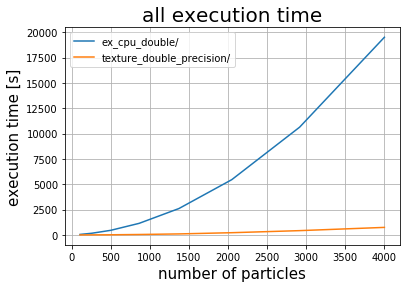

-------------------------------------------------------------


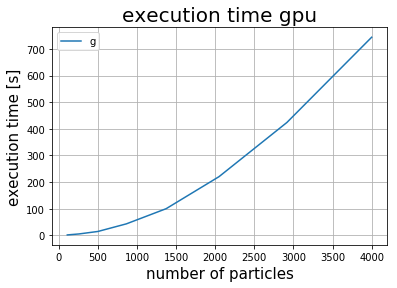

execution time for cpu in seconds: [   50.72   163.22   454.7   1144.17  2603.94  5455.27 10639.1  19515.4 ]
################################################
execution time for gpu global_gpu/  in sec: [  1.4448    5.03868  14.4445   43.0609   99.9738  220.33    423.922
 744.256  ]
speedup for  global_gpu/  :  [35.10520487 32.39340462 31.4791097  26.57097274 26.04622411 24.7595425
 25.09683385 26.22135394]
################################################


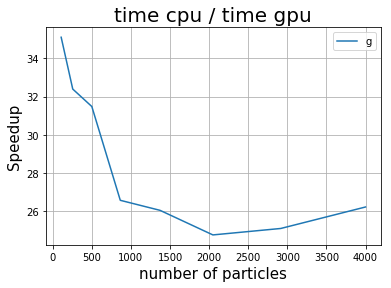

In [35]:
print("let's now see the performance on this code")

simulationtime = ["simulation_cpudouble.time","simulation_texturedouble.time"]

print("simulation of 10'000 steps for solid phase starting from a fcc lattice configure")

for j in range(2):
        x,time = np.loadtxt(simulationtime[j],usecols=(0,1),unpack='true')
        time = time/1000 #in second
        plt.plot(x,time)
        plt.xlabel("number of particles",fontsize=15)
        plt.ylabel("execution time [s]",fontsize=15)
        plt.legend(double_codes)
        plt.title("all execution time",fontsize=20)
        plt.grid(True)
        
print("-------------------------------------------------------------")
    
plt.show()

x,time = np.loadtxt(simulationtime[1],usecols=(0,1),unpack='true')
time = time/1000 #in second
plt.plot(x,time)
plt.xlabel("number of particles",fontsize=15)
plt.ylabel("execution time [s]",fontsize=15)
plt.legend("gpu time")
plt.title("execution time gpu",fontsize=20)
plt.grid(True)
        
print("-------------------------------------------------------------")
    
plt.show()
    
x,time0 = np.loadtxt(simulationtime[0],usecols=(0,1),unpack='true')
time0 = time0/1000

print("execution time for cpu in seconds:",time0)

x,time = np.loadtxt(simulationtime[1],usecols=(0,1),unpack='true')
time = time/1000 #in second
print("################################################")
print("execution time for gpu", codes[j], " in sec:",time)
speedup = time0/time
print("speedup for ",codes[j]," : ",speedup)
print("################################################")
plt.plot(x,speedup)
plt.xlabel("number of particles",fontsize=15)
plt.ylabel("Speedup",fontsize=15)
plt.title("time cpu / time gpu",fontsize=20)
plt.legend("gpu speedup")
plt.grid(True)

plt.show()